In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy



In [2]:
# Einlesen der Daten
data_deng = pd.read_csv('dataSources\BLAT_ECOLX_Deng_2012_Kopie.csv', delimiter = ';' )
data_firnberg = pd.read_csv('dataSources\BLAT_ECOLX_Firnberg_2014_Kopie.csv',delimiter = ';')
data_stiffler = pd.read_csv('dataSources\BLAT_ECOLX_Stiffler_2015_Kopie.csv',delimiter = ';')



DMS Score Spalten zu float konvertieren:

In [3]:
data_deng['DMS_score'] = data_deng['DMS_score'].str.replace(',', '.').astype(float)
data_deng.head()

data_stiffler['DMS_score'] = data_stiffler['DMS_score'].str.replace(',', '.').astype(float)
data_stiffler.head()

data_firnberg['DMS_score'] = data_firnberg['DMS_score'].str.replace(',', '.').astype(float)
data_firnberg.tail()



mutant                                   mutated_sequence  DMS_score  \
4778  W286G  MSIQHFRVALIPFFAAFCLPVFAHPETLVKVKDAEDQLGARVGYIE...     0.0056   
4779  W286F  MSIQHFRVALIPFFAAFCLPVFAHPETLVKVKDAEDQLGARVGYIE...     0.1729   
4780  W286E  MSIQHFRVALIPFFAAFCLPVFAHPETLVKVKDAEDQLGARVGYIE...     0.0171   
4781  W286C  MSIQHFRVALIPFFAAFCLPVFAHPETLVKVKDAEDQLGARVGYIE...     0.0024   
4782  W286D  MSIQHFRVALIPFFAAFCLPVFAHPETLVKVKDAEDQLGARVGYIE...     0.0114   

      DMS_score_bin  
4778              0  
4779              0  
4780              0  
4781              0  
4782              0

In [4]:

#Mutanten in einheitlicher Reihenfolge speichern, gehen alle von 24 bis 286, bei Firnberg fehlen einige
sortierung = data_deng.iloc[0:len(data_deng),0]
sortierung.head()

sortierung = sortierung.tolist()


Data Frame erstellen

In [5]:

columns = ['Stiffler', 'Deng', 'Firnberg']
index = [sortierung]
merged = pd.DataFrame( columns = columns, index = index)
merged.head()
#leerer frame

Stiffler Deng Firnberg
H24C      NaN  NaN      NaN
H24Y      NaN  NaN      NaN
H24W      NaN  NaN      NaN
H24V      NaN  NaN      NaN
H24T      NaN  NaN      NaN

In [6]:
#dataframe füllen
for i in range(0,len(data_stiffler)):
    mutant = data_stiffler['mutant'][i]
    score = data_stiffler['DMS_score'][i]
    merged['Stiffler'][mutant]= score

merged.head()



Stiffler Deng Firnberg
H24C  -0.41826  NaN      NaN
H24Y -0.885025  NaN      NaN
H24W -1.347586  NaN      NaN
H24V -0.026874  NaN      NaN
H24T -0.067188  NaN      NaN

In [7]:

#Mutanten in einheitlicher Reihenfolge speichern, gehen alle von 24 bis 286, bei Firnberg fehlen einige
sortierung = data_deng.iloc[0:len(data_deng),0]
sortierung.head()

sortierung = sortierung.tolist()


In [8]:

for i in range(0,len(data_deng)):
    mutant = data_deng['mutant'][i]
    score = data_deng['DMS_score'][i]
    merged['Deng'][mutant]= score

merged.head()

Stiffler      Deng Firnberg
H24C  -0.41826 -3.924478      NaN
H24Y -0.885025 -2.170022      NaN
H24W -1.347586 -4.345218      NaN
H24V -0.026874 -3.011503      NaN
H24T -0.067188 -1.565248      NaN

In [9]:
for i in range(0,len(data_firnberg)):
    mutant = data_firnberg['mutant'][i]
    score = data_firnberg['DMS_score'][i]
    merged['Firnberg'][mutant]= score

print(merged)

       Stiffler      Deng Firnberg
H24C   -0.41826 -3.924478   0.5646
H24Y  -0.885025 -2.170022   0.7054
H24W  -1.347586 -4.345218   0.6021
H24V  -0.026874 -3.011503   1.2224
H24T  -0.067188 -1.565248   1.2289
...         ...       ...      ...
W286G -3.228429  -4.96307   0.0056
W286F -0.780425 -4.542329   0.1729
W286E -2.545852 -4.542329   0.0171
W286C -2.983762 -4.542329   0.0024
W286A -3.178798  -4.96307      NaN

[4996 rows x 3 columns]


Merged Dataframe nicht Normalisiert

In [10]:
mergedc_n = merged.copy()
mergedc_z = merged.copy()

print(mergedc_n.head(20))

      Stiffler      Deng Firnberg
H24C  -0.41826 -3.924478   0.5646
H24Y -0.885025 -2.170022   0.7054
H24W -1.347586 -4.345218   0.6021
H24V -0.026874 -3.011503   1.2224
H24T -0.067188 -1.565248   1.2289
H24S  0.036166 -1.901829   1.1215
H24R -0.002526 -1.732651   1.0547
H24Q -0.135568 -1.685328   0.9294
H24P -1.010848  -2.74331   0.2836
H24D -0.181607 -2.788294   1.0992
H24M -0.224781 -4.345218      NaN
H24L -0.480347 -3.924478   0.8055
H24K   0.01447  -0.47765   1.2413
H24I -0.359191  -2.83688   0.7909
H24G -0.060242 -2.113703   1.1275
H24F -0.818487 -4.345218   0.7883
H24E -0.279024 -1.486533   0.9899
H24N -0.043093 -1.102421   1.4825
P25C -0.364138  -3.92495   0.6226
P25D -0.028403  -3.92495   0.6841


N Normalisierter dataframe :  merged_n

In [11]:
def min_max_filter(mergedc_n: pd.DataFrame) -> pd.DataFrame:
    'Min-Max Normalisierung'
    for x in mergedc_n.columns:
        max_value: float = mergedc_n[x].max()
        min_value: float = mergedc_n[x].min()

        mergedc_n[x] = (mergedc_n[x] - min_value) / (max_value - min_value)
    return mergedc_n
print(min_max_filter(mergedc_n))


       Stiffler      Deng  Firnberg
H24C   0.811164  0.250327  0.194307
H24Y   0.697293  0.456368  0.242832
H24W   0.584448  0.200915   0.20723
H24V   0.906646  0.357546  0.421009
H24T   0.896811  0.527393  0.423249
...         ...       ...       ...
W286G  0.125601  0.128355  0.001654
W286F  0.722811  0.177767  0.059312
W286E  0.292121  0.177767  0.005618
W286C   0.18529  0.177767  0.000551
W286A  0.137709  0.128355       NaN

[4996 rows x 3 columns]


Z Normalisierter data frame: mergedc_z
mü und sigma für Datensätze :

In [12]:
gauss = {'Stiffler':[],'Deng':[],'Firnberg':[]}

for x in merged.columns:
    mu = np.mean(merged[x])
    sigma = np.std(merged[x])

    gauss[x] = [mu, sigma]
print(gauss)



{'Stiffler': [-1.2555861699099258, 1.1515351455907572], 'Deng': [-2.7197178679617875, 1.527209855765294], 'Firnberg': [0.5094850899205352, 0.44877201488038154]}


Z-Normalisierung

In [13]:
def z_filter(mergedc_z: pd.DataFrame) -> pd.DataFrame:
    'Z-Normalisierung'
    for x in mergedc_z.columns:
        mu = gauss[x][0]
        sigma = gauss[x][1]
        mergedc_z[x] = (mergedc_z[x]-mu)/ sigma
    return mergedc_z
print(z_filter(mergedc_z))


       Stiffler      Deng  Firnberg
H24C   0.727139 -0.788864  0.122813
H24Y   0.321797  0.359935  0.436558
H24W  -0.079893 -1.064359  0.206374
H24V   1.067021 -0.191058   1.58859
H24T   1.032012  0.755934  1.603074
...         ...       ...       ...
W286G -1.713229 -1.468922 -1.122809
W286F  0.412633 -1.193425 -0.750014
W286E -1.120475 -1.193425 -1.097183
W286C -1.500758 -1.193425 -1.129939
W286A -1.670129 -1.468922       NaN

[4996 rows x 3 columns]


##Normalisierte Datensätze mergen:
1. mean und var berechnen
2. für z und n normalisierte Datensatz



mergedc_n_mv = mergedc_n.copy()
liste = mergedc_n_mv.mean(axis = 1)
print(liste)




In [14]:
def mean_var_merge(data : pd.DataFrame):

    data['mean'] = data.mean(axis = 1, skipna= True)
    data['var'] = data.var(axis = 1, skipna = True )
    return data
#print(mean_var_merge(mergedc_n_mv))
#print(mean_var_merge(mergedc_z_mv))
#print(mergedc_n_mv)

POSITIONSEFFEKTE

In [15]:
mergedc_n_mv = mergedc_n.copy()
mergedc_z_mv = mergedc_z.copy()
mean_var_merge(mergedc_n_mv)
mean_var_merge(mergedc_z_mv)


Stiffler      Deng  Firnberg      mean       var
H24C   0.727139 -0.788864  0.122813  0.020363  0.388292
H24Y   0.321797  0.359935  0.436558  0.372763  0.002277
H24W  -0.079893 -1.064359  0.206374 -0.312626   0.29621
H24V   1.067021 -0.191058   1.58859  0.821518  0.557994
H24T   1.032012  0.755934  1.603074   1.13034  0.124442
...         ...       ...       ...       ...       ...
W286G -1.713229 -1.468922 -1.122809 -1.434986  0.058675
W286F  0.412633 -1.193425 -0.750014 -0.510269  0.458642
W286E -1.120475 -1.193425 -1.097183 -1.137028  0.001681
W286C -1.500758 -1.193425 -1.129939 -1.274708  0.026221
W286A -1.670129 -1.468922       NaN -1.569525  0.010121

[4996 rows x 5 columns]

In [16]:

#append empty Position-column
mergedc_n_mv["Position"] = np.nan
mergedc_z_mv["Position"] = np.nan

#assign Positions
for i in range(0,len(mergedc_n_mv)):
    indices = [1,-1]
    s=mergedc_n_mv.iloc[i].name[0]
    parts = [s[i:j] for i,j in zip(indices, indices[1:])]
    for part in parts:
        mergedc_n_mv["Position"][i]=int(part)
mergedc_n_mv["Position"]=mergedc_n_mv["Position"].astype(int)

mergedc_z_mv["Position"] = np.nan

#assign Positions
for i in range(0,len(mergedc_z_mv)):
    indices = [1,-1]
    s=mergedc_z_mv.iloc[i].name[0]
    parts = [s[i:j] for i,j in zip(indices, indices[1:])]
    for part in parts:
        mergedc_z_mv["Position"][i]=int(part)
mergedc_z_mv["Position"] = mergedc_z_mv["Position"].astype(int)


C:\Users\Christoph Luh\AppData\Local\Temp\ipykernel_11484\2001184063.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mergedc_n_mv["Position"][i]=int(part)
C:\Users\Christoph Luh\AppData\Local\Temp\ipykernel_11484\2001184063.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mergedc_n_mv["Position"][i]=int(part)
C:\Users\Christoph Luh\AppData\Local\Temp\ipykernel_11484\2001184063.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

In [17]:
mergedc_z_mv["Position"]

H24C      24
H24Y      24
H24W      24
H24V      24
H24T      24
        ... 
W286G    286
W286F    286
W286E    286
W286C    286
W286A    286
Name: Position, Length: 4996, dtype: int32

In [18]:
#Position_means Df aufbauen
columns = ['mean_Stiffler_n','var_Stiffler_n','mean_Deng_n','var_Deng_n','mean_Firnberg_n','var_Firnberg_n','mean_all_n','var_all_n','mean_Stiffler_z','var_Stiffler_z','mean_Deng_z','var_Deng_z','mean_Firnberg_z','var_Firnberg_z','mean_all_z','var_all_z']
index = range(int(mergedc_n_mv["Position"][0]), int(mergedc_n_mv["Position"][-1])+1)
##warum muss ich hier nochmal Int() nutzen? Ich habe im Chunk darüber doch int(part) verwendet...(Positionswerte wurden scheinbar als floats gespeichert)?

position_means= pd.DataFrame( columns = columns, index = index)
position_means.index.name="Position"


In [19]:
for i in range(mergedc_n_mv["Position"][0], mergedc_n_mv["Position"][-1]+1):
    Pos=[]
    for j in range(np.where(mergedc_n_mv["Position"]==i)[0][0], np.where(mergedc_n_mv["Position"]==i)[0][-1]+1):
        Pos=np.append(Pos, mergedc_n_mv.iloc[j,0:3][0:3])
    position_means.loc[i, "mean_all_n"]=np.nanmean(Pos)
    position_means.loc[i, "var_all_n"]=np.nanvar(Pos)

for i in range(mergedc_z_mv["Position"][0], mergedc_z_mv["Position"][-1]+1):
    Pos=[]
    for j in range(np.where(mergedc_z_mv["Position"]==i)[0][0], np.where(mergedc_z_mv["Position"]==i)[0][-1]+1):
        Pos=np.append(Pos, mergedc_z_mv.iloc[j,0:3][0:3])
    position_means.loc[i, "mean_all_z"]=np.nanmean(Pos)
    position_means.loc[i, "var_all_z"]=np.nanvar(Pos)

In [20]:
#means für Positionen berechnen mit groupby

grouped_n=mergedc_n_mv.groupby("Position")
grouped_z=mergedc_z_mv.groupby("Position")
#(NAs should be excluded by default)

#Means der Positionen in Position_means DF einsetzen
position_means["mean_Stiffler_n"]= grouped_n.mean()["Stiffler"]
position_means["mean_Deng_n"]= grouped_n.mean()["Deng"]
position_means["mean_Firnberg_n"]= grouped_n.mean()["Firnberg"]
position_means["mean_Stiffler_z"]= grouped_z.mean()["Stiffler"]
position_means["mean_Deng_z"]= grouped_z.mean()["Deng"]
position_means["mean_Firnberg_z"]= grouped_z.mean()["Firnberg"]


In [21]:
#Varianzen noch einbringen
position_means["var_Stiffler_n"]= grouped_n.var()["Stiffler"]
position_means["var_Deng_n"]= grouped_n.var()["Deng"]
position_means["var_Firnberg_n"]= grouped_n.var()["Firnberg"]
position_means["var_Stiffler_z"]= grouped_z.var()["Stiffler"]
position_means["var_Deng_z"]= grouped_z.var()["Deng"]
position_means["var_Firnberg_z"]= grouped_z.var()["Firnberg"]


position_means

mean_Stiffler_n var_Stiffler_n mean_Deng_n var_Deng_n  \
Position                                                         
24              0.827952       0.009871     0.40783   0.019859   
25              0.868782       0.010995    0.424186   0.029516   
26              0.887442       0.001312    0.512003   0.009361   
27              0.463575       0.039616    0.345967   0.005709   
28              0.712919       0.045084    0.415597   0.017025   
...                  ...            ...         ...        ...   
282             0.511994       0.082602    0.474935   0.018866   
283             0.577036       0.064666    0.448505   0.013882   
284             0.838571       0.021394    0.467188   0.020676   
285             0.768163       0.040906    0.400825   0.026953   
286             0.314421       0.027956    0.152398   0.001021   

         mean_Firnberg_n var_Firnberg_n mean_all_n var_all_n mean_Stiffler_z  \
Position                                                                       
24              0.324853        0.01085   0.523898  0.061493        0.786898   
25              0.251631       0.005555   0.514866  0.082138        0.932237   
26              0.315543       0.007382   0.619685  0.057627        0.998662   
27              0.095793       0.009894   0.301778  0.040958       -0.510157   
28              0.189328       0.009222   0.458146    0.0679        0.377421   
...                  ...            ...        ...       ...             ...   
282             0.117033       0.019768   0.367987  0.070003       -0.337803   
283             0.151755        0.01685   0.392432  0.061842       -0.106276   
284               0.3261       0.009417   0.547843   0.06307        0.824699   
285             0.250498       0.014158   0.477138  0.073332         0.57407   
286             0.027791       0.001888   0.167318  0.023562       -1.041095   

         var_Stiffler_z mean_Deng_z var_Deng_z mean_Firnberg_z var_Firnberg_z  \
Position                                                                        
24             0.125082    0.089304   0.617338        0.966881       0.453596   
25             0.139314    0.180497   0.917549         0.49345       0.232222   
26              0.01663    0.670128   0.291014        0.906685       0.308594   
27              0.50198   -0.255614   0.177461       -0.514142       0.413599   
28             0.571262    0.132612   0.529266        0.090621       0.385542   
...                 ...         ...        ...             ...            ...   
282            1.046659    0.463454    0.58649       -0.376808       0.826386   
283            0.819396     0.31609   0.431554       -0.152312       0.704399   
284            0.271089    0.420258   0.642744        0.974941       0.393654   
285            0.518326    0.050248   0.837884        0.486125       0.591881   
286            0.354228   -1.334869   0.031742       -0.953817       0.078933   

         mean_all_z var_all_z  
Position                       
24          0.60771  0.518624  
25         0.535395  0.502145  
26         0.849455  0.195452  
27        -0.426638  0.359798  
28          0.20849  0.491832  
...             ...       ...  
282       -0.083719  0.926648  
283        0.019167  0.661913  
284         0.73577  0.468079  
285        0.368077  0.668752  
286       -1.112715  0.174624  

[263 rows x 16 columns]

In [22]:
#N-Normierung droppen
position_means_Z=position_means.iloc[:,8:]
position_means_Z

mean_Stiffler_z var_Stiffler_z mean_Deng_z var_Deng_z  \
Position                                                         
24              0.786898       0.125082    0.089304   0.617338   
25              0.932237       0.139314    0.180497   0.917549   
26              0.998662        0.01663    0.670128   0.291014   
27             -0.510157        0.50198   -0.255614   0.177461   
28              0.377421       0.571262    0.132612   0.529266   
...                  ...            ...         ...        ...   
282            -0.337803       1.046659    0.463454    0.58649   
283            -0.106276       0.819396     0.31609   0.431554   
284             0.824699       0.271089    0.420258   0.642744   
285              0.57407       0.518326    0.050248   0.837884   
286            -1.041095       0.354228   -1.334869   0.031742   

         mean_Firnberg_z var_Firnberg_z mean_all_z var_all_z  
Position                                                      
24              0.966881       0.453596    0.60771  0.518624  
25               0.49345       0.232222   0.535395  0.502145  
26              0.906685       0.308594   0.849455  0.195452  
27             -0.514142       0.413599  -0.426638  0.359798  
28              0.090621       0.385542    0.20849  0.491832  
...                  ...            ...        ...       ...  
282            -0.376808       0.826386  -0.083719  0.926648  
283            -0.152312       0.704399   0.019167  0.661913  
284             0.974941       0.393654    0.73577  0.468079  
285             0.486125       0.591881   0.368077  0.668752  
286            -0.953817       0.078933  -1.112715  0.174624  

[263 rows x 8 columns]

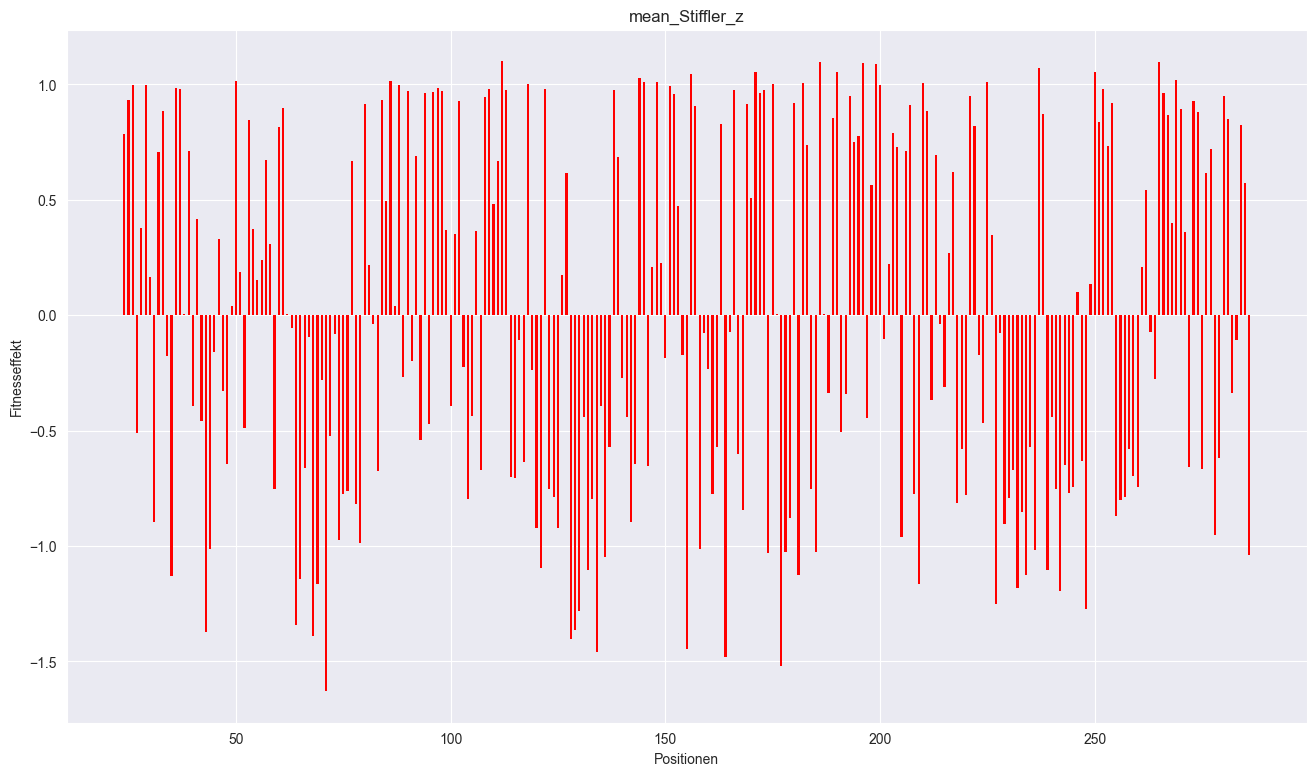

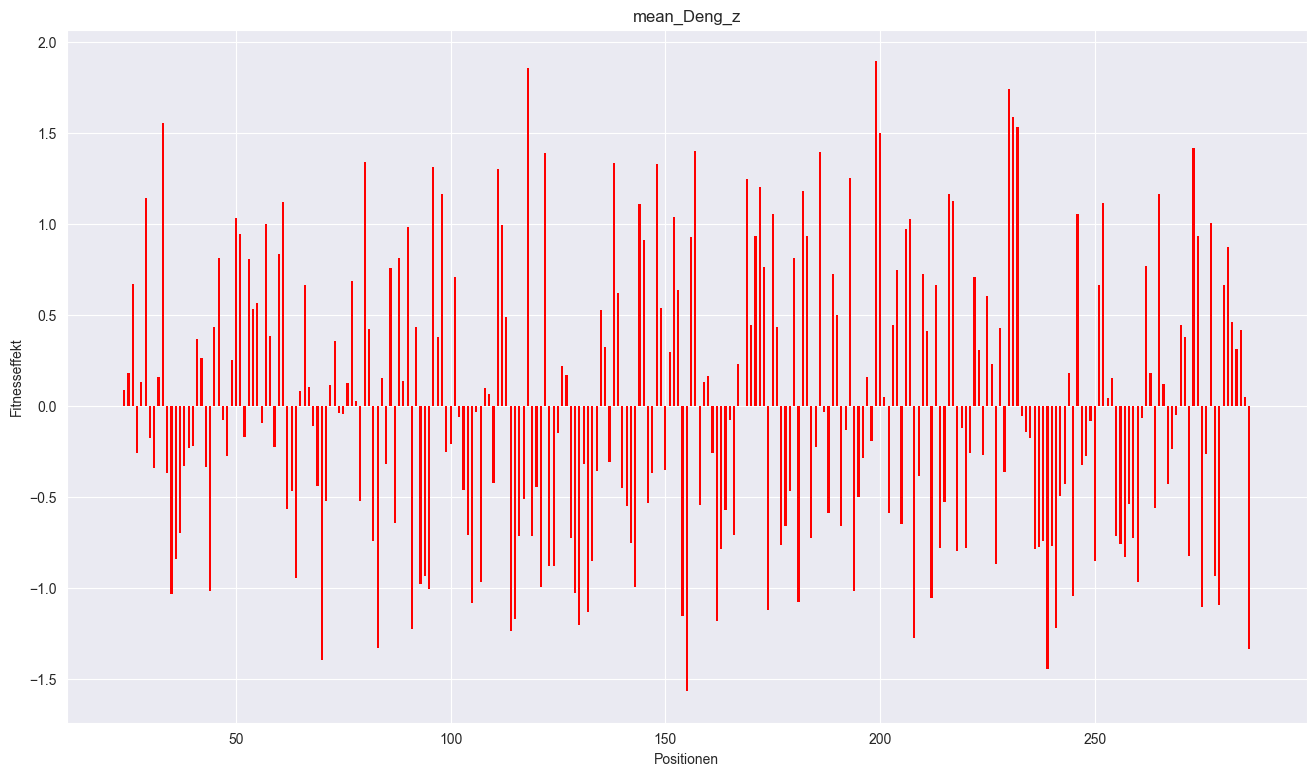

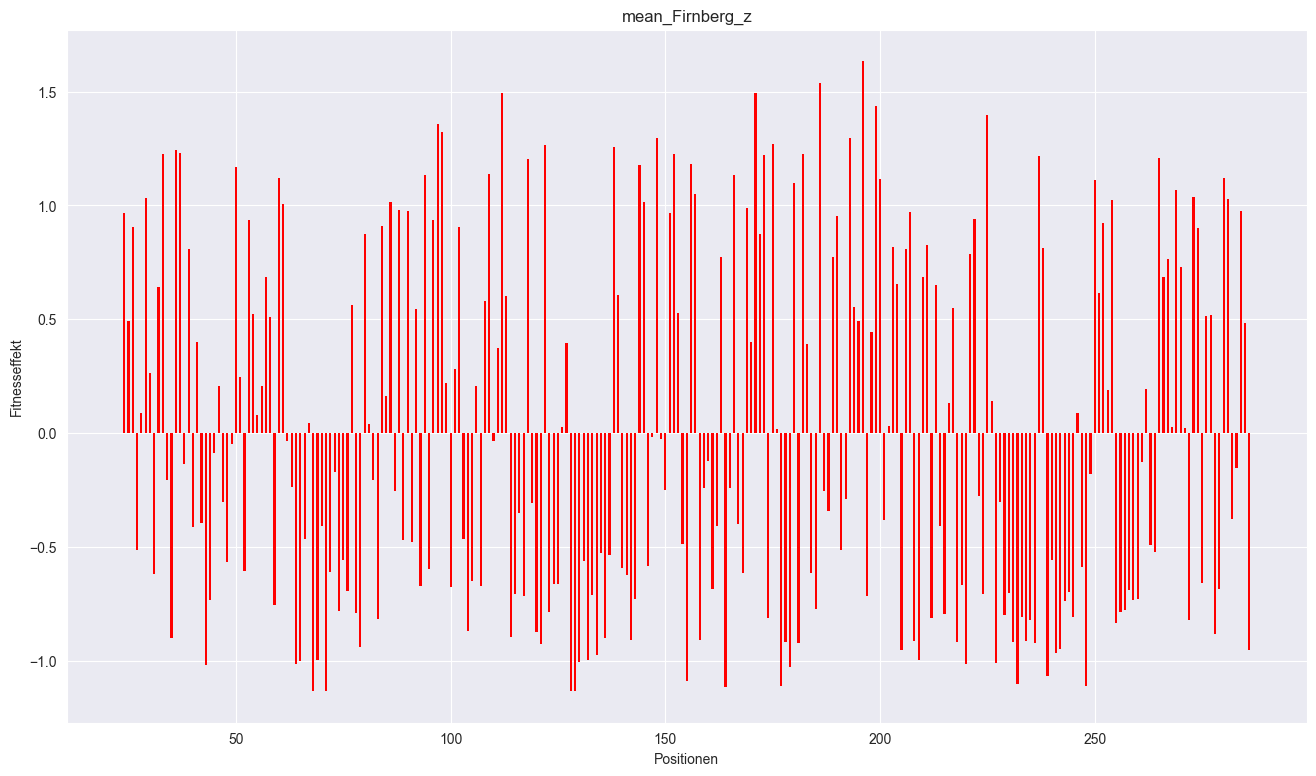

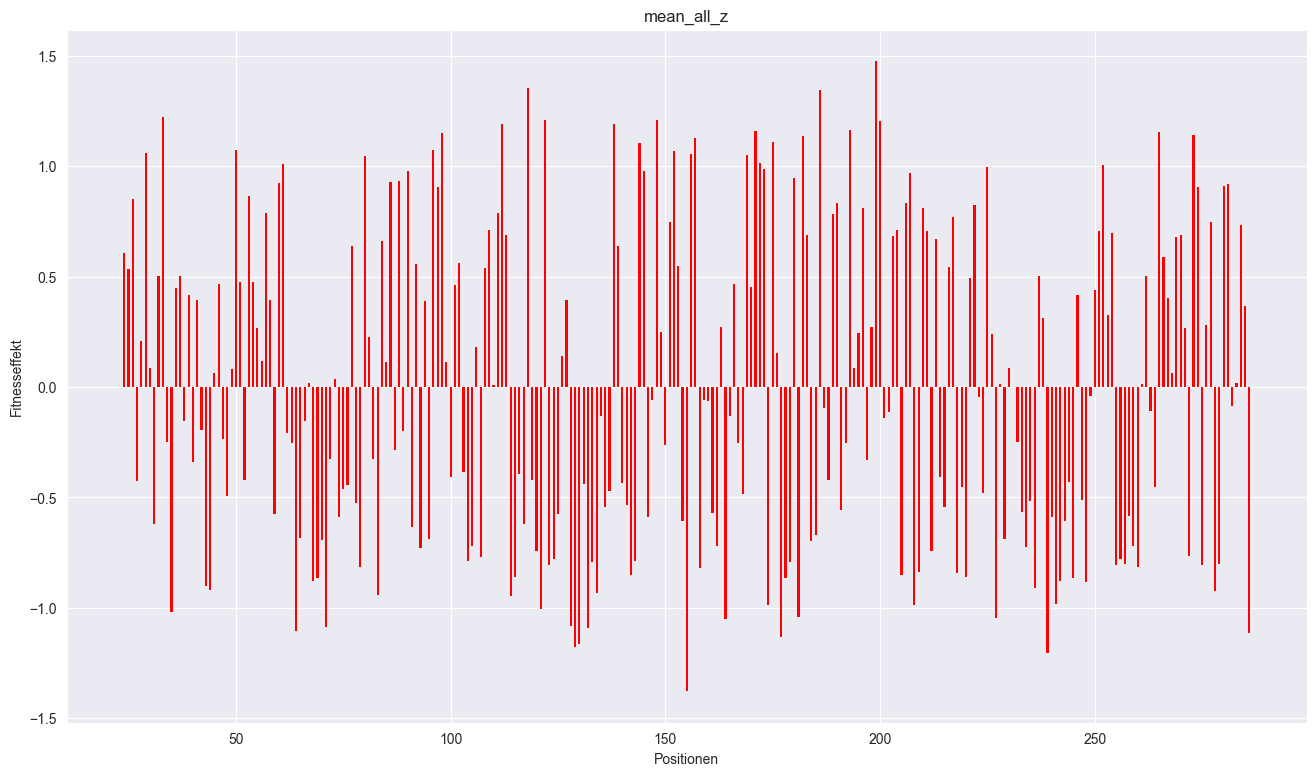

In [23]:
#Diagramme mit Positionseffekten
for i in range(0, len(position_means_Z.columns)//2):
    j=i*2
    ywerte = position_means_Z.iloc[:,j]
    xwerte = position_means_Z.index
    plt.figure(figsize=(16,9))
    plt.bar(xwerte, ywerte, color='red', width=0.5, linewidth=0)
    plt.xlabel("Positionen")
    plt.ylabel("Fitnesseffekt")
    plt.title(position_means_Z.columns[j])
    plt.show()

In [24]:
#look at tops:
top_25=mergedc_z_mv.copy()
# Liste für die Dataframes erstellen
top_25_DSlist = []

# Iteration über die ersten vier Spalten
for col in top_25.columns[:4]:
    # Neuen DataFrame mit zwei Spalten erstellen
    new_DS = top_25[[col, 'Position']]
    # Dataframe zur Liste hinzufügen
    top_25_DSlist.append(new_DS)
top_25_DSlist

for i in range(0, len(top_25_DSlist)):
    t=top_25_DSlist[i].quantile(0.75)[0] #set cutoff-threshhold at certain quantile level of fitnessvalues ([0] to adress fitness values, not quantile of position column!)
    top_25_DSlist[i].iloc[:,0] = top_25_DSlist[i].iloc[:,0] >= t #setz True of False to each mutatnt (True means it is above quantile threshhold)

#look at bottoms:
bottom_25=mergedc_z_mv.copy()
# Liste für die Dataframes erstellen
bottom_25_DSlist = []

# Iteration über die ersten vier Spalten
for col in bottom_25.columns[:4]:
    # Neuen DataFrame mit zwei Spalten erstellen
    new_DS = bottom_25[[col, 'Position']]
    # Dataframe zur Liste hinzufügen
    bottom_25_DSlist.append(new_DS)
bottom_25_DSlist

for i in range(0, len(bottom_25_DSlist)):
    t=bottom_25_DSlist[i].quantile(0.25)[0] #set cutoff-threshhold at certain quantile level of fitnessvalues ([0] to adress fitness values, not quantile of position column!)
    bottom_25_DSlist[i].iloc[:,0] = bottom_25_DSlist[i].iloc[:,0] <= t #setz True of False to each mutatnt (True means it is above quantile threshhold)

In [25]:
top_25_DSlist

[      Stiffler  Position
 H24C     False        24
 H24Y     False        24
 H24W     False        24
 H24V      True        24
 H24T      True        24
 ...        ...       ...
 W286G    False       286
 W286F    False       286
 W286E    False       286
 W286C    False       286
 W286A    False       286
 
 [4996 rows x 2 columns],
         Deng  Position
 H24C   False        24
 H24Y   False        24
 H24W   False        24
 H24V   False        24
 H24T   False        24
 ...      ...       ...
 W286G  False       286
 W286F  False       286
 W286E  False       286
 W286C  False       286
 W286A  False       286
 
 [4996 rows x 2 columns],
       Firnberg  Position
 H24C     False        24
 H24Y     False        24
 H24W     False        24
 H24V      True        24
 H24T      True        24
 ...        ...       ...
 W286G    False       286
 W286F    False       286
 W286E    False       286
 W286C    False       286
 W286A    False       286
 
 [4996 rows x 2 columns],
    

In [26]:
#Positionsefekt von 0 bis 1:
top_25_DSlist_poseff=[]
for i in range (0, len(top_25_DSlist)):
    x=top_25_DSlist[i].iloc[:,0].groupby(top_25_DSlist[i].iloc[:,1])
    top_25_DSlist_poseff.append(x.mean()) #Durchschnitt der Werte in der Fitness-Value Spate (T or F, je nachdem ob Wert über oder unter Treshhold war) für jede Position. Ein Durchschnitt von 1 würde bedeuten, dass alle Mutanten True wären, also < Treshhold sind. So werden Positionen mit wenigen Mutanten nicht übersehen.

    bottom_25_DSlist_poseff=[]
for i in range (0, len(bottom_25_DSlist)):
    x=bottom_25_DSlist[i].iloc[:,0].groupby(bottom_25_DSlist[i].iloc[:,1])
    bottom_25_DSlist_poseff.append(x.mean())

In [27]:
top_25_DSlist_poseff

[Position
 24     0.388889
 25     0.578947
 26     0.578947
 27     0.052632
 28     0.263158
          ...   
 282    0.157895
 283    0.052632
 284    0.473684
 285    0.105263
 286         0.0
 Name: Stiffler, Length: 263, dtype: object,
 Position
 24     0.111111
 25     0.368421
 26     0.421053
 27     0.052632
 28     0.157895
          ...   
 282    0.315789
 283    0.263158
 284    0.421053
 285    0.210526
 286         0.0
 Name: Deng, Length: 263, dtype: object,
 Position
 24     0.555556
 25     0.157895
 26     0.315789
 27     0.052632
 28     0.105263
          ...   
 282    0.157895
 283    0.105263
 284    0.526316
 285    0.210526
 286         0.0
 Name: Firnberg, Length: 263, dtype: object,
 Position
 24     0.444444
 25     0.263158
 26     0.473684
 27     0.052632
 28     0.157895
          ...   
 282    0.210526
 283    0.210526
 284    0.526316
 285    0.263158
 286         0.0
 Name: mean, Length: 263, dtype: object]

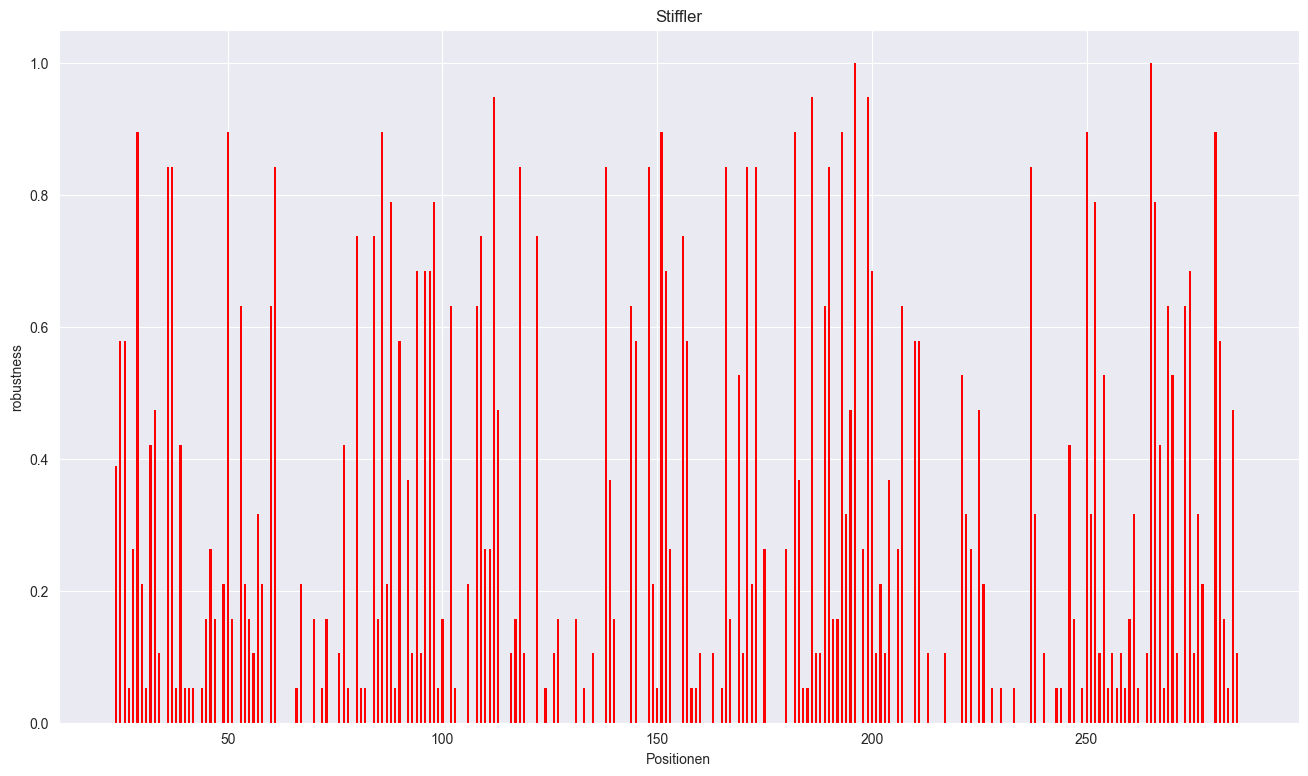

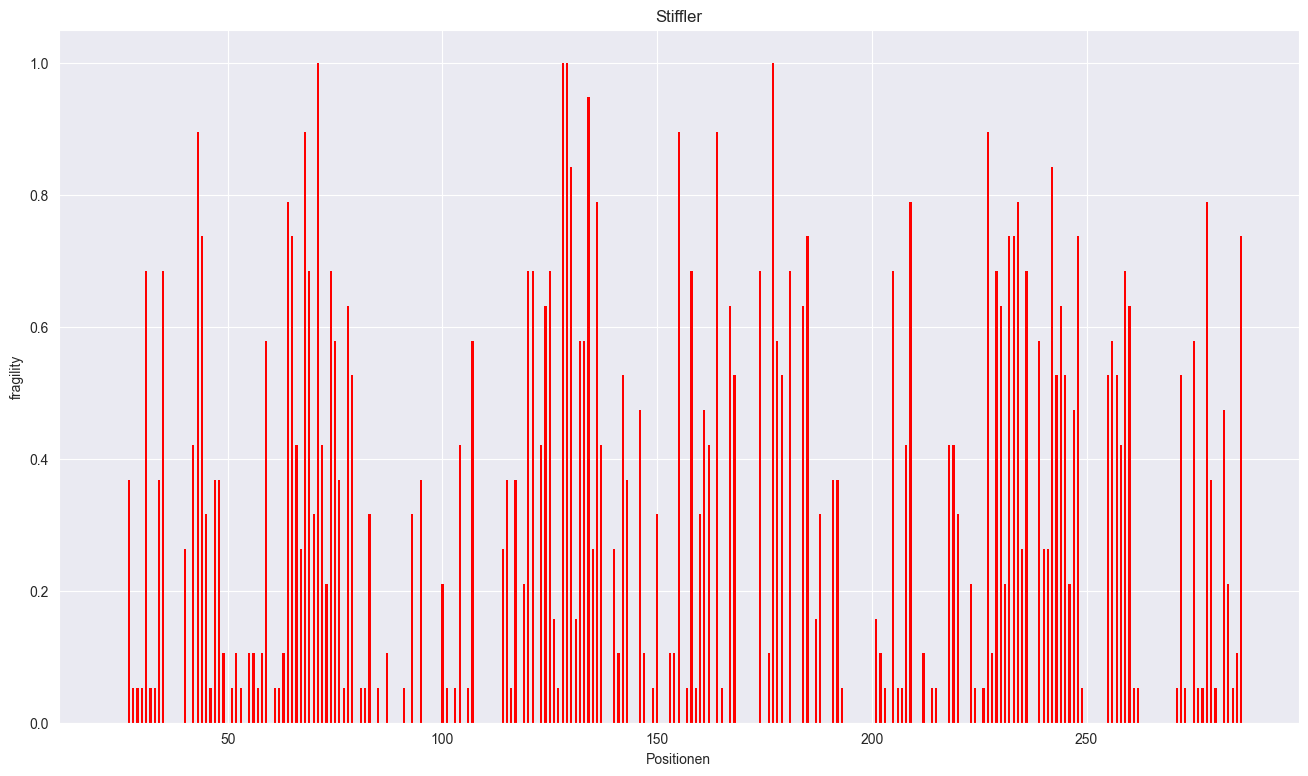

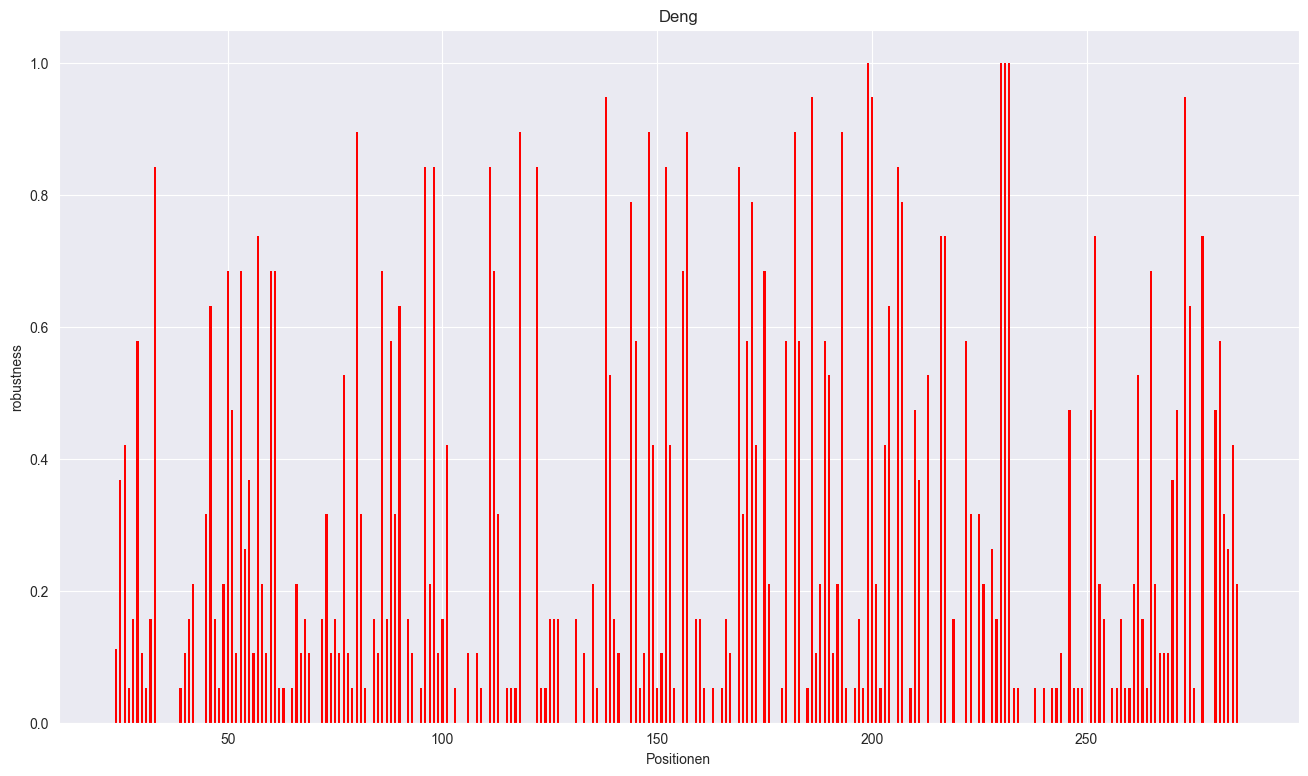

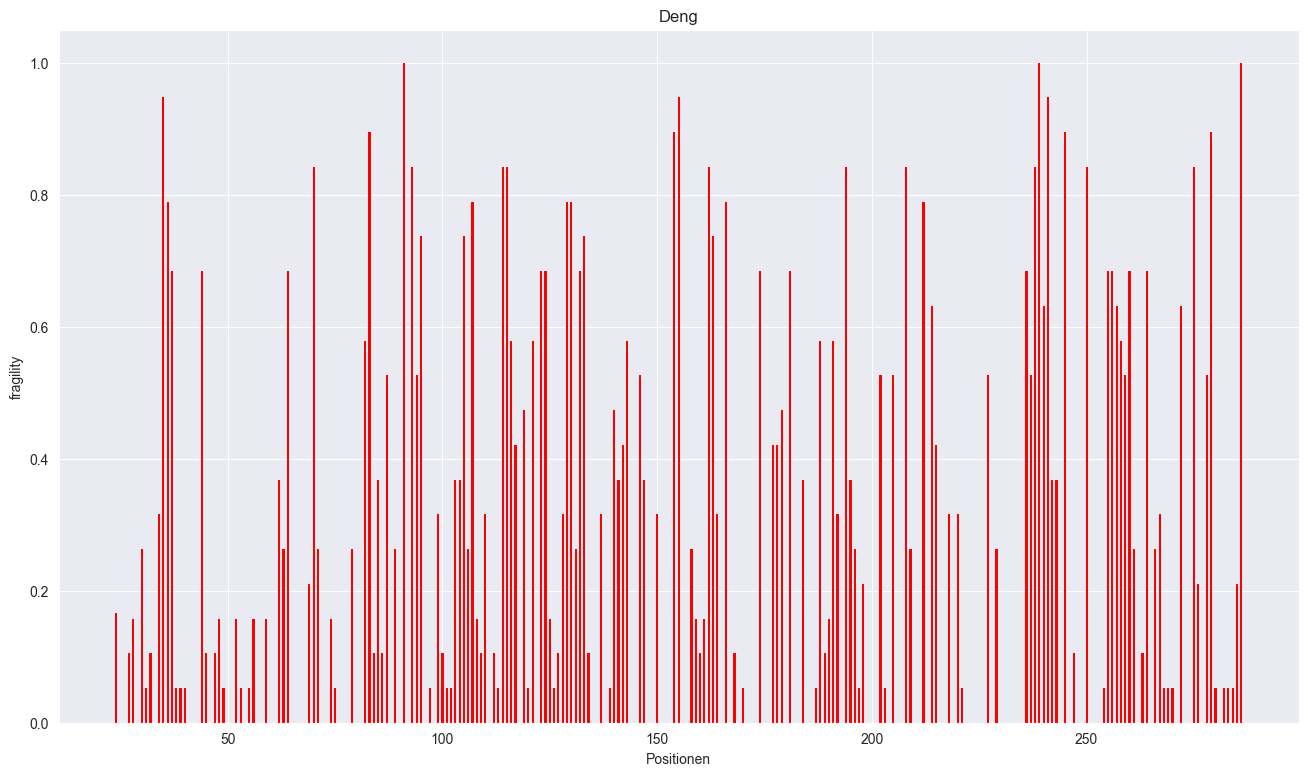

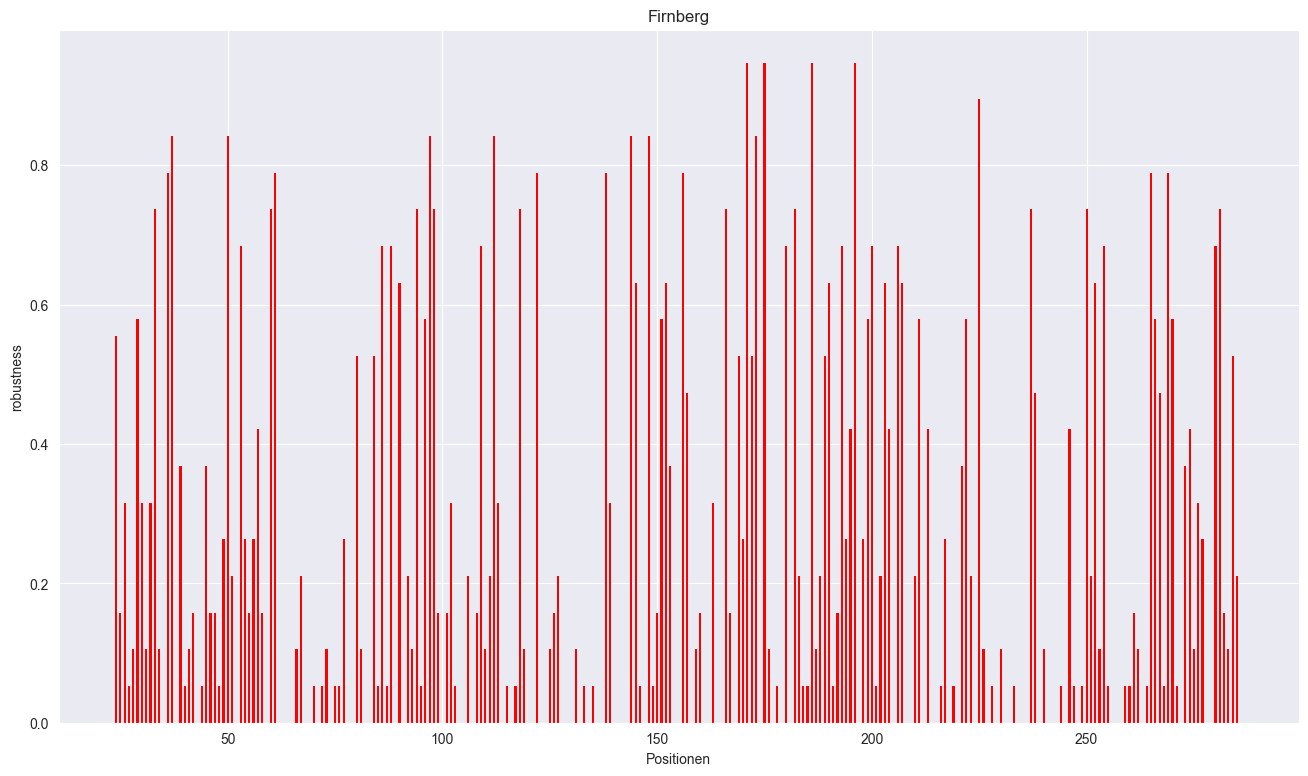

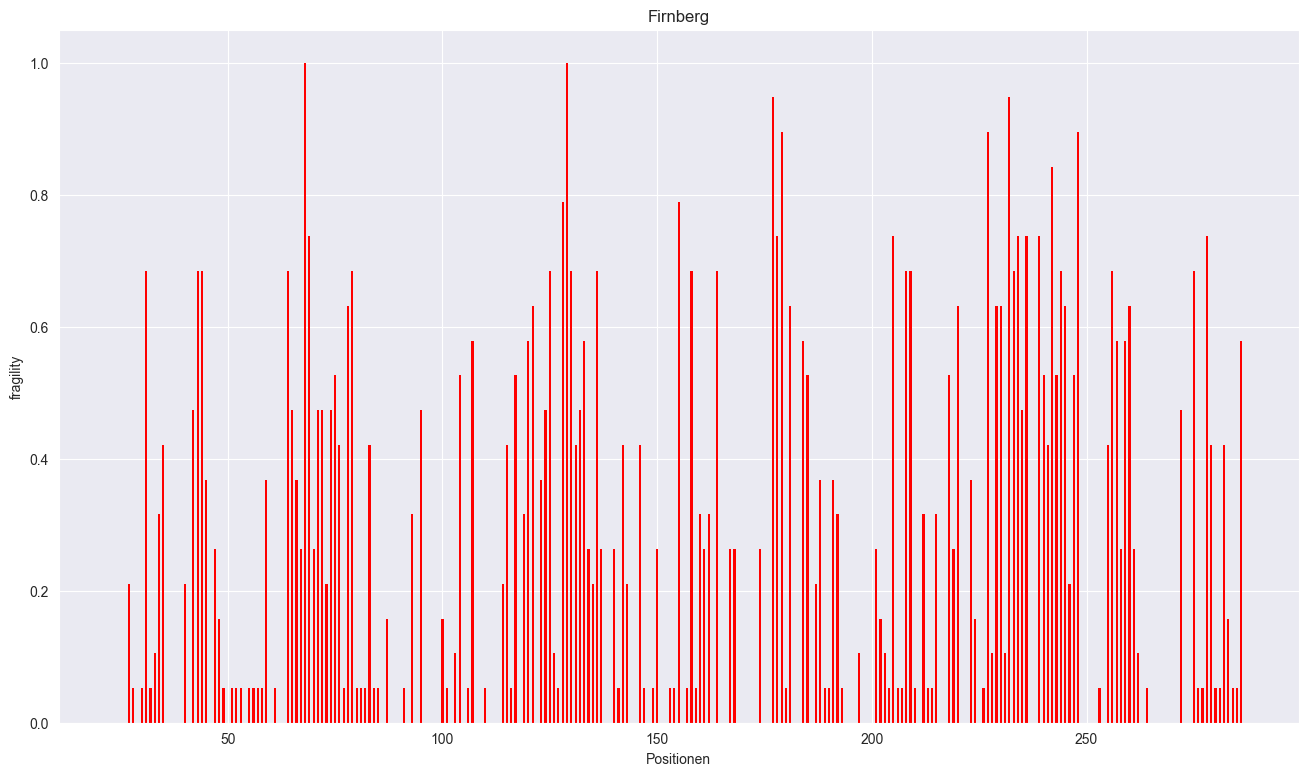

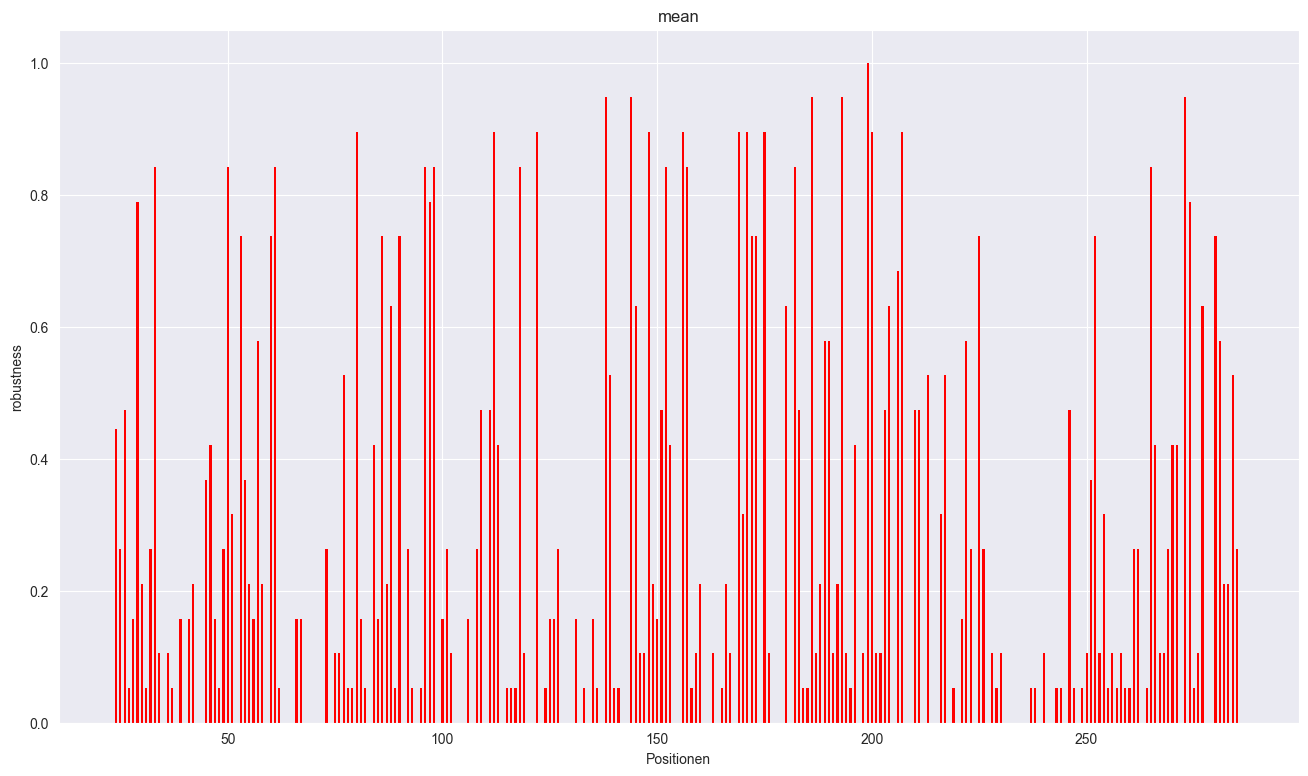

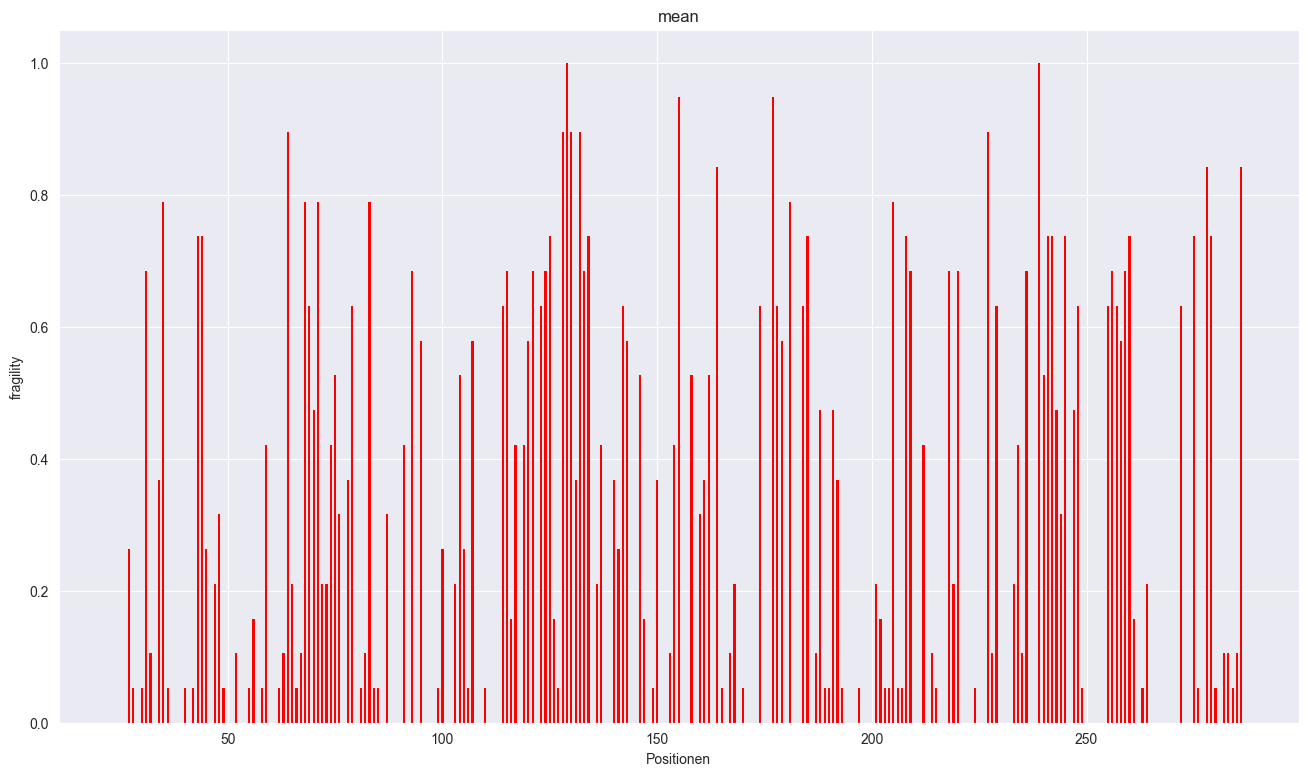

In [28]:
#plotten
for i in range (0, len(top_25_DSlist)):
    #tops
    ywerte = top_25_DSlist_poseff[i]
    xwerte = top_25_DSlist_poseff[i].index
    plt.figure(figsize=(16,9))
    plt.bar(xwerte, ywerte, color='red', width=0.5, linewidth=0)
    plt.xlabel("Positionen")
    plt.ylabel("robustness")
    plt.title(top_25.columns[i])
    plt.show()

    #bottoms
    ywerte = bottom_25_DSlist_poseff[i]
    xwerte = bottom_25_DSlist_poseff[i].index
    plt.figure(figsize=(16,9))
    plt.bar(xwerte, ywerte, color='red', width=0.5, linewidth=0)
    plt.xlabel("Positionen")
    plt.ylabel("fragility")
    plt.title(bottom_25.columns[i])
    plt.show()


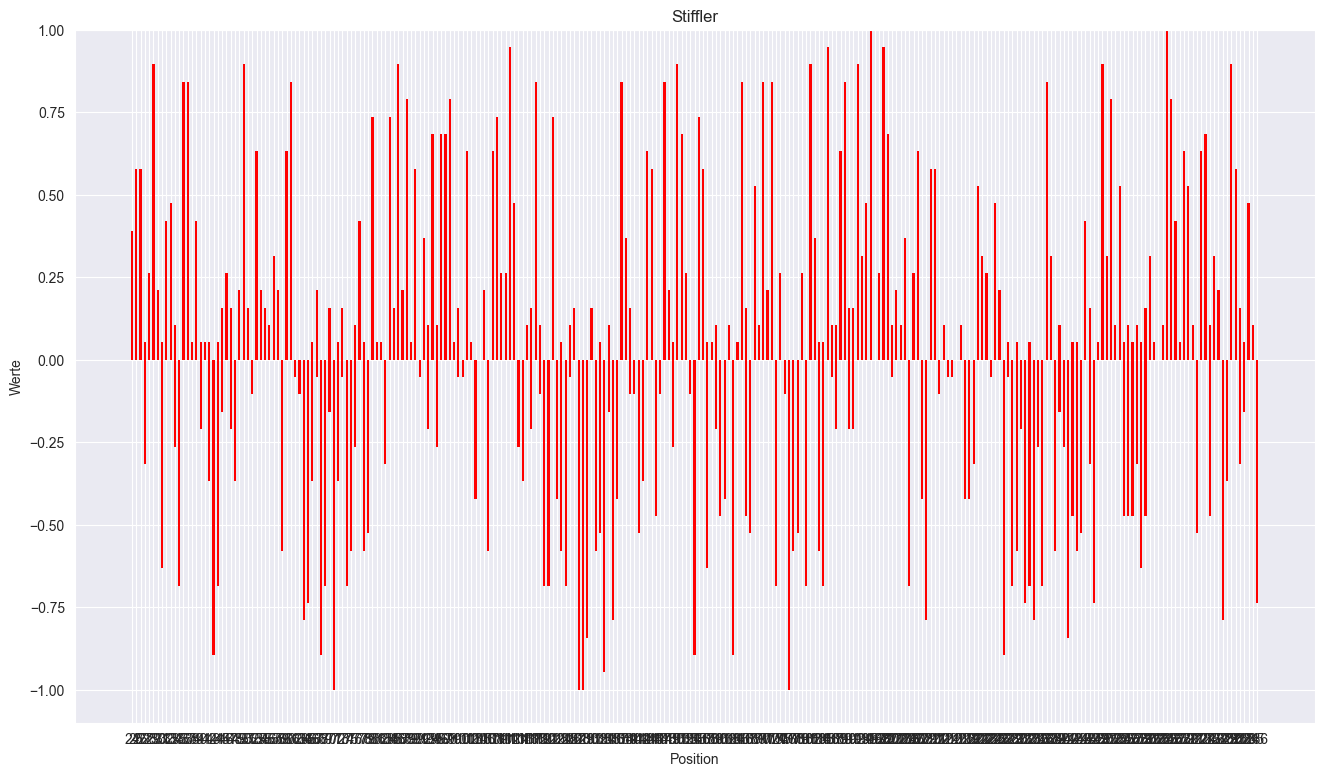

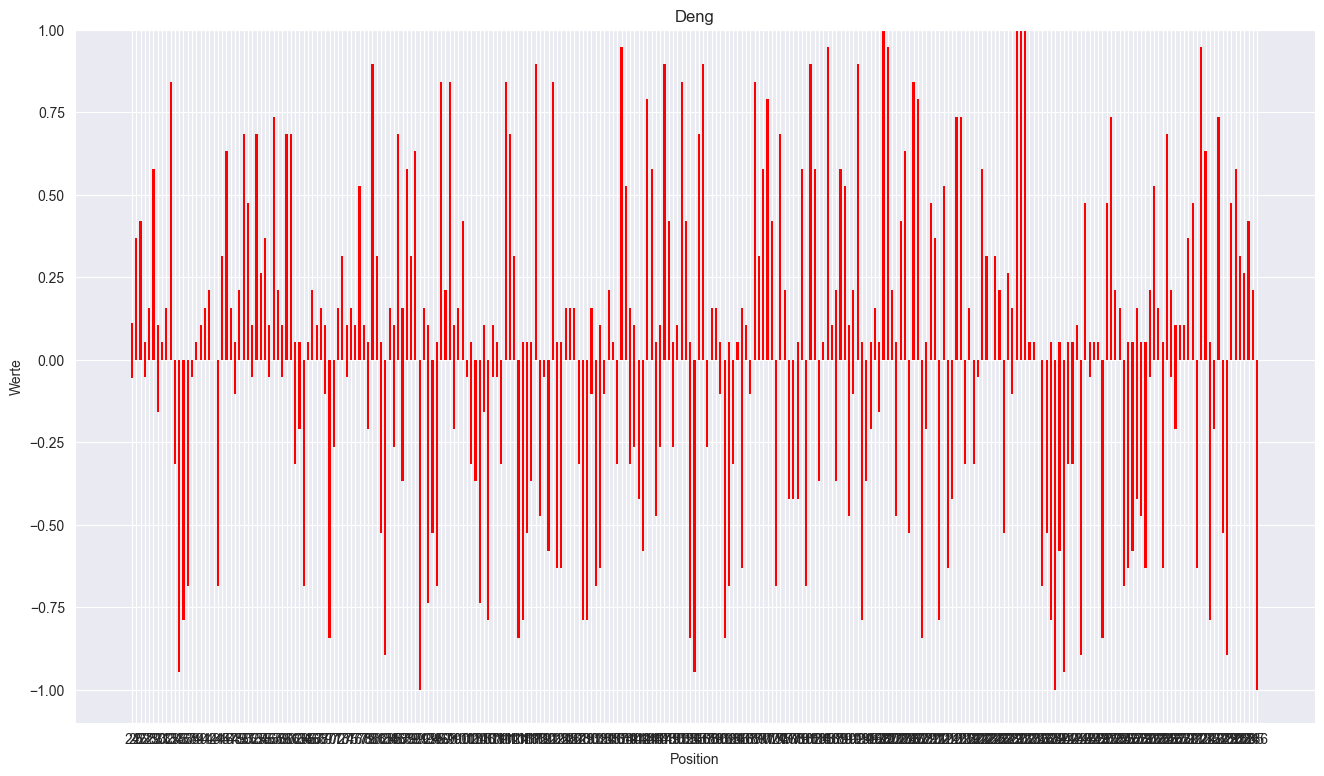

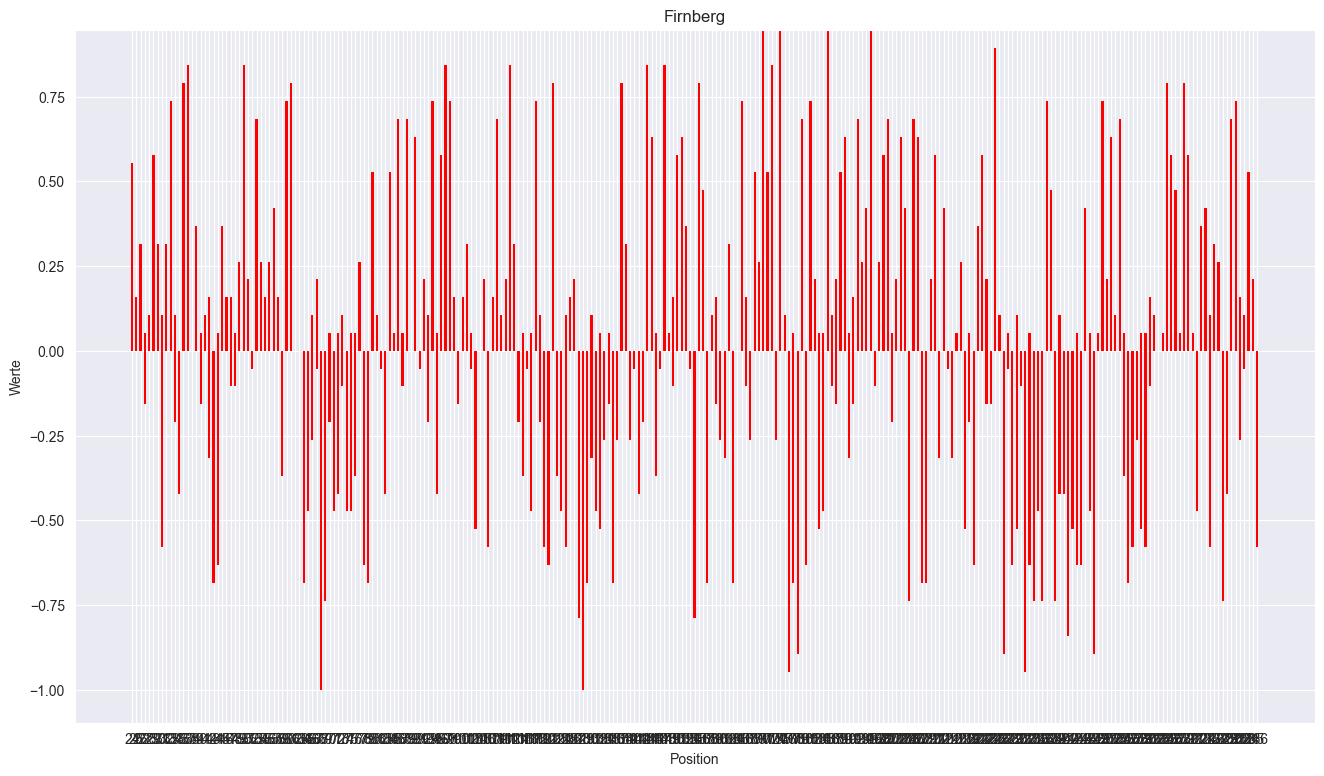

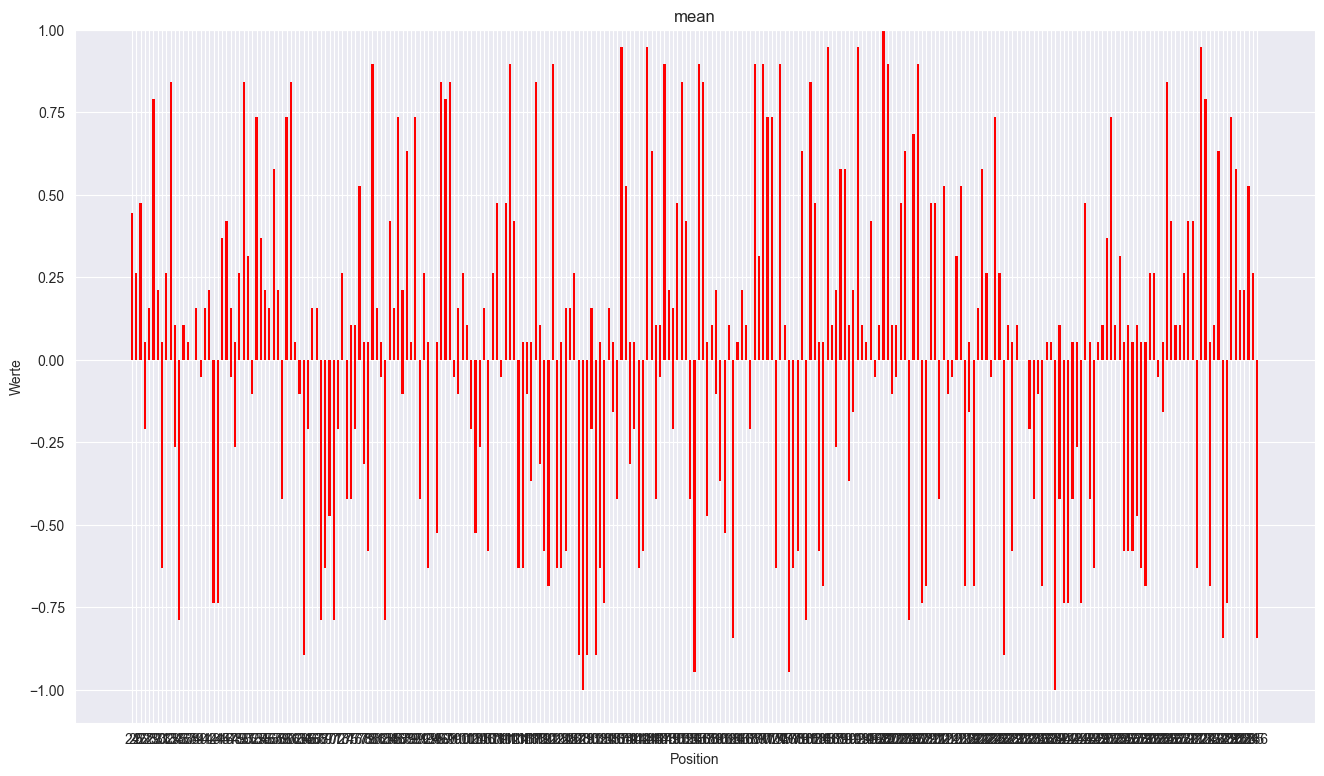

In [29]:
#andere plot Möglichkeit (Robustness (Top) nach oben, Fragility (Bottom) nach unten):

positions = top_25_DSlist_poseff[0].index

for i in range (0, len(top_25_DSlist)):
    top_values = top_25_DSlist_poseff[i]
    bottom_values = bottom_25_DSlist_poseff[i]*-1

# Breite der Balken

# X-Koordinaten für die Balkenpositionen
    x = range(len(positions))

# Barplot erstellen
    plt.figure(figsize=(16,9))
    plt.bar(x, top_values, label='Top',color='red', width=0.5, linewidth=0)
    plt.bar(x, bottom_values, width=0.5, linewidth=0, label='Bottom', bottom=top_values, color='red')

# Achsenbeschriftungen
    plt.xlabel('Position')
    plt.ylabel('Werte')
    plt.xticks(x, positions)
    plt.title(top_25.columns[i])

# Plot anzeigen
    plt.show()


aktuell: Position, für die alle Mutanten knapp über 75% Quantile liegen hätte 100% Robustness, genauso wie Position für die alle Mutanten über 95% Quantile liegen... da müsste noch differenziert werden.
Modell: Für jede Position Robustness/Fragility [%] für Quantile=75% bis 95% oder 99% berechnen->Kurve Fitten (x: Quantile, y: Fragility/Robustness [%] -> Area under Curve als F/R-score nehmen (evtl noch Bereiche für hohe Quantile größer Gewichten (also: y:F/R[%]*Q oder *Q^2 oder Q^3 etc. -> dann schauen welche Gewichtung die besten Ergebnisse gibt)

In [30]:
#F/R [%] für jede Position bei verschiedenen Quantilen berechnen
#tops:

top_Fit=mergedc_z_mv.copy()
top_Fit_DSlist=[]
for col in top_Fit.columns[:4]:
    new_DS = top_Fit[[col, 'Position']]
    top_Fit_DSlist.append(new_DS)



top_Fit_Qlist=[]
top_used_quantiles=[]
for i in range(0, len(top_Fit_DSlist)):
    top_Fit_Qlist.insert(i,[]) #add sublist for Dataset number i
    for j in range (0,25):
        top_Fit_Qlist[i].insert(j, top_Fit_DSlist[i].copy()) #use copy of df instead of copying whole list at beginning and then inserting a df from copied list, because original will be changed if df in copied list is changed!
        q=(j+75)/100 #iterate over Quantiles 75% - 99%
        t=top_Fit_DSlist[i].quantile(q)[0] #set threshhold as quantile
        top_Fit_Qlist[i][j].iloc[:,0]=(top_Fit_Qlist[i][j].iloc[:,0] >= t)
        if i == len(top_Fit_DSlist)-1:
            top_used_quantiles.append(q) #keep used quantiles for later weighting of quantile values

#calculate top % for each position for different quantile-threshholds for each dataset

top_Fit_Qlist_poseff=[]
for i in range (0, len(top_Fit_DSlist)):
    top_Fit_Qlist_poseff.insert(i,[])
    for j in range (0,25):
        x=top_Fit_Qlist[i][j].iloc[:,0].groupby(top_Fit_Qlist[i][j].iloc[:,1])
        top_Fit_Qlist_poseff[i].insert(j, x.mean())

top_Fit_Qlist_poseff

#bottoms:
bottom_Fit=mergedc_z_mv.copy()
bottom_Fit_DSlist=[]
for col in bottom_Fit.columns[:4]:
    new_DS = bottom_Fit[[col, 'Position']]
    bottom_Fit_DSlist.append(new_DS)



bottom_Fit_Qlist=[]
bottom_used_quantiles=[]
for i in range(0, len(bottom_Fit_DSlist)):
    bottom_Fit_Qlist.insert(i,[]) #add sublist for Dataset number i
    for j in range (0,25):
        bottom_Fit_Qlist[i].insert(j, bottom_Fit_DSlist[i].copy()) #use copy of df instead of copying whole list at beginning and then inserting a df from copied list, because original will be changed if df in copied list is changed!
        q=(j+1)/100 #iterate over Quantiles 1% - 25%
        t=bottom_Fit_DSlist[i].quantile(q)[0] #set threshhold as quantile
        bottom_Fit_Qlist[i][j].iloc[:,0]=(bottom_Fit_Qlist[i][j].iloc[:,0] <= t)
        if i == len(bottom_Fit_DSlist)-1:
            bottom_used_quantiles.append(q)

#calculate bottom % for each position for different quantile-threshholds for each dataset

bottom_Fit_Qlist_poseff=[]
for i in range (0, len(bottom_Fit_DSlist)):
    bottom_Fit_Qlist_poseff.insert(i,[])
    for j in range (0,25):
        x=bottom_Fit_Qlist[i][j].iloc[:,0].groupby(bottom_Fit_Qlist[i][j].iloc[:,1])
        bottom_Fit_Qlist_poseff[i].insert(j, x.mean())


In [31]:
#extract F/R % for each position at different quantiles for each dataset to plot curve and calculate area under curve as R/F-score of position:

#tops:
top_pos_eff_quantiles_df=position_means_Z.copy() #create df with needed correct structure (positions by datasets)


for i in range(0, len(top_Fit_DSlist)): #iterate over datasets
    m=i*2
    for k in range(0,len(top_Fit_Qlist_poseff[0][0])): #iterate over positions
        top_pos_eff_quantiles=[]
        for j in range(0,25): #iterate over quantiles
            top_pos_eff_quantiles.append(top_Fit_Qlist_poseff[i][j].iloc[k])
        top_pos_eff_quantiles_df.iloc[k,m]=top_pos_eff_quantiles
top_pos_eff_quantiles_df = top_pos_eff_quantiles_df.drop(top_pos_eff_quantiles_df.columns[[1, 3, 5, 7]], axis=1)


#bottoms:

bottom_pos_eff_quantiles_df=position_means_Z.copy() #create df with needed correct structure (positions by datasets)


for i in range(0, len(bottom_Fit_DSlist)): #iterate over datasets
   m=i*2
   for k in range(0,len(bottom_Fit_Qlist_poseff[0][0])): #iterate over positions
     bottom_pos_eff_quantiles=[]
     for j in range(0,25): #iterate over quantiles
        bottom_pos_eff_quantiles.append(bottom_Fit_Qlist_poseff[i][j].iloc[k])
     bottom_pos_eff_quantiles_df.iloc[k,m]=bottom_pos_eff_quantiles
bottom_pos_eff_quantiles_df = bottom_pos_eff_quantiles_df.drop(bottom_pos_eff_quantiles_df.columns[[1, 3, 5, 7]], axis=1)


In [32]:
#the pos_eff_quantiles_dfs contains for each Dataset and each position the F/R %s for Quantiles 75% - 99%
#now we want to fit curves to each position in each dataset

from scipy.integrate import trapz

top_auc_df = pd.DataFrame()

# Berechnung der AUC für jede Spalte und Speicherung im neuen DataFrame
for col in top_pos_eff_quantiles_df.columns:
    if col != 'Position':
        new_col_name = col + 'AUC'
        auc_values = top_pos_eff_quantiles_df[col].apply(lambda x: trapz(x, dx=1))
        top_auc_df[new_col_name] = auc_values

# Zusammenführen der Positionsspalte mit dem neuen DataFrame
top_auc_df.index.name = 'Position'

bottom_auc_df = pd.DataFrame()

# Berechnung der AUC für jede Spalte und Speicherung im neuen DataFrame
for col in bottom_pos_eff_quantiles_df.columns:
    if col != 'Position':
        new_col_name = col + 'AUC'
        auc_values = bottom_pos_eff_quantiles_df[col].apply(lambda x: trapz(x, dx=1))
        bottom_auc_df[new_col_name] = auc_values

# Zusammenführen der Positionsspalte mit dem neuen DataFrame
bottom_auc_df.index.name = 'Position'


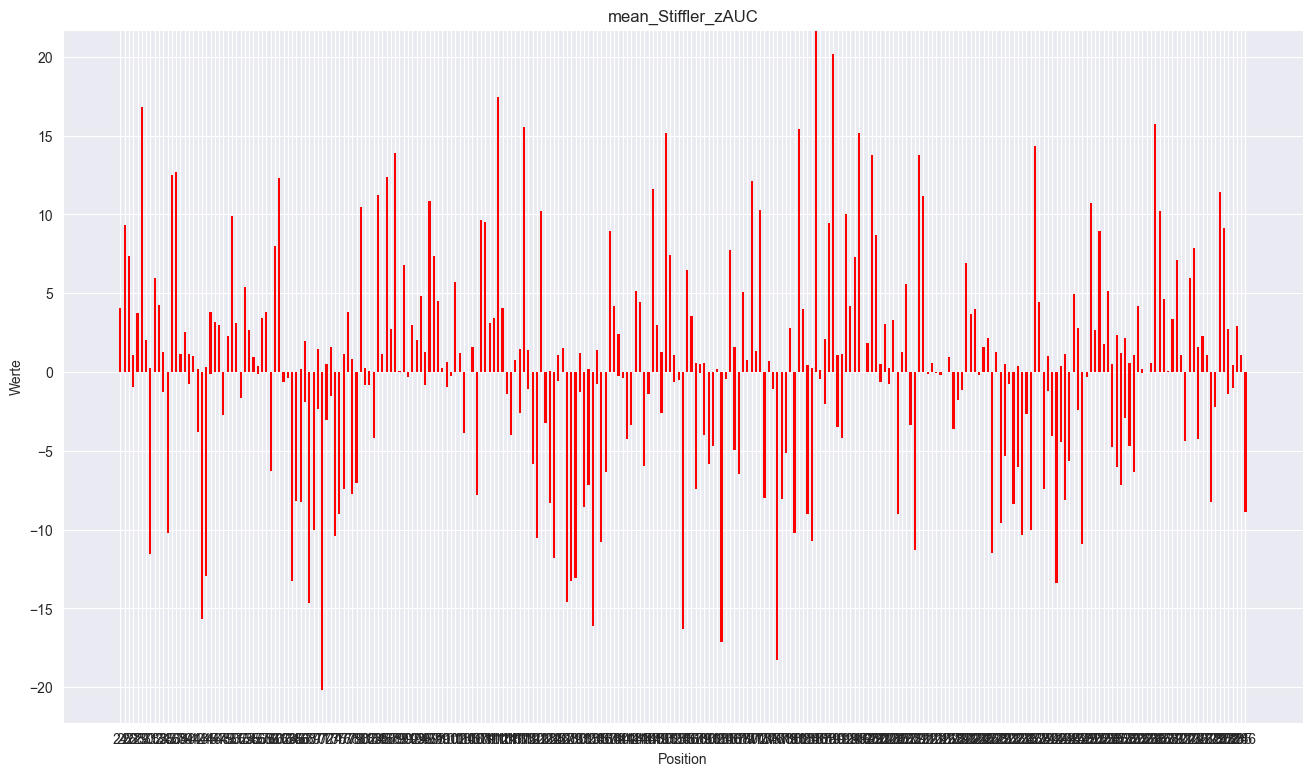

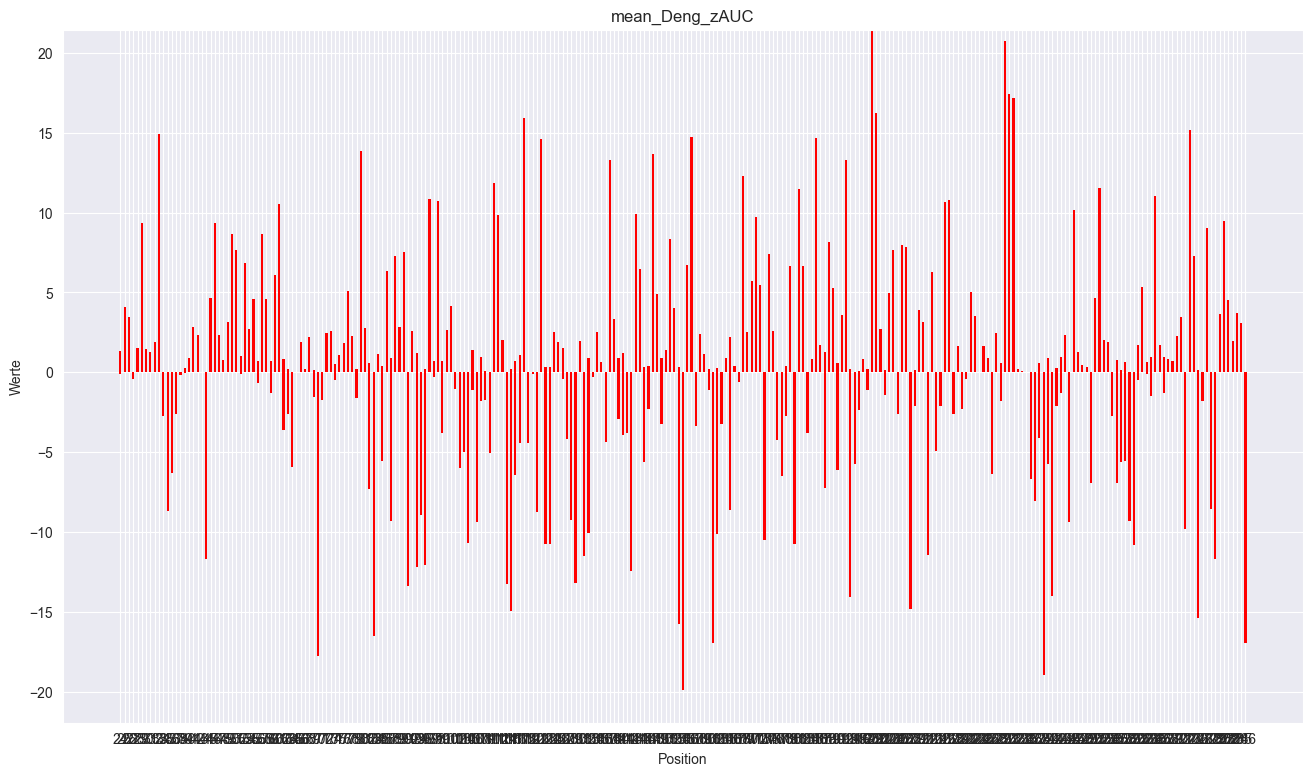

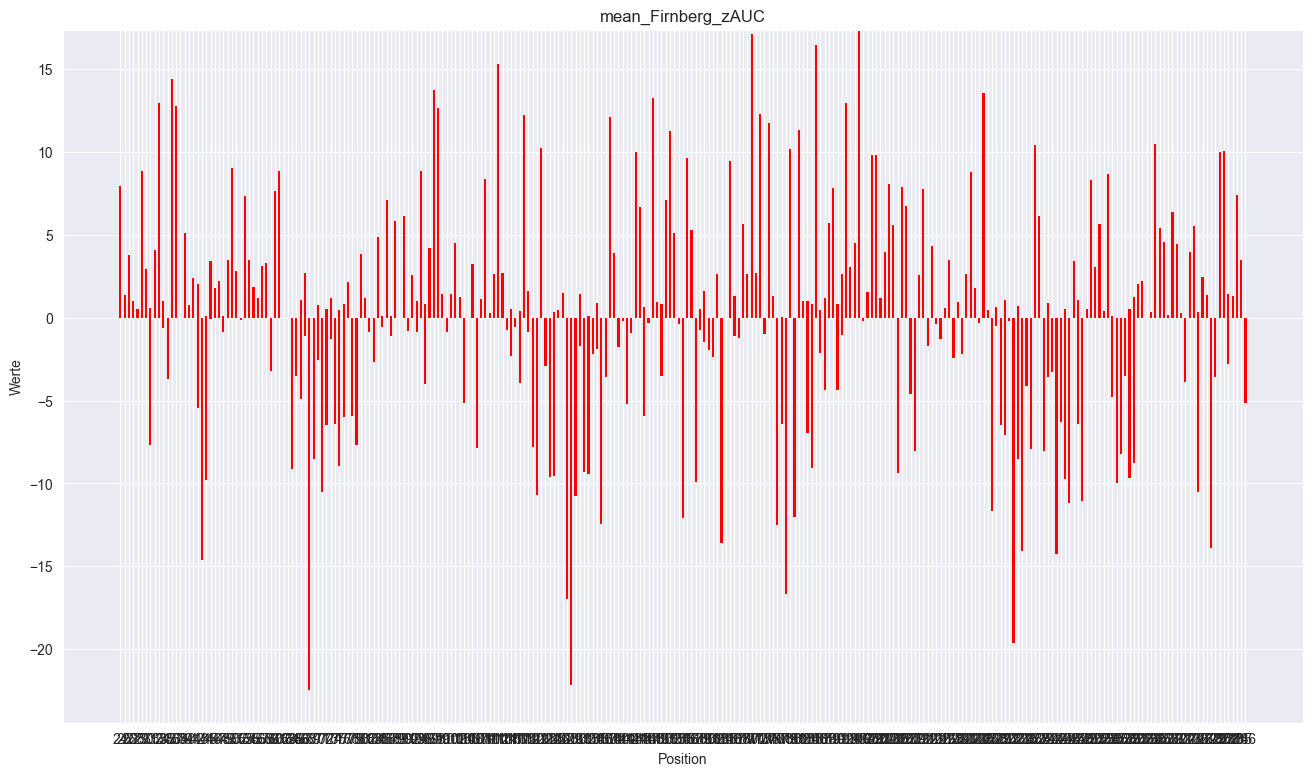

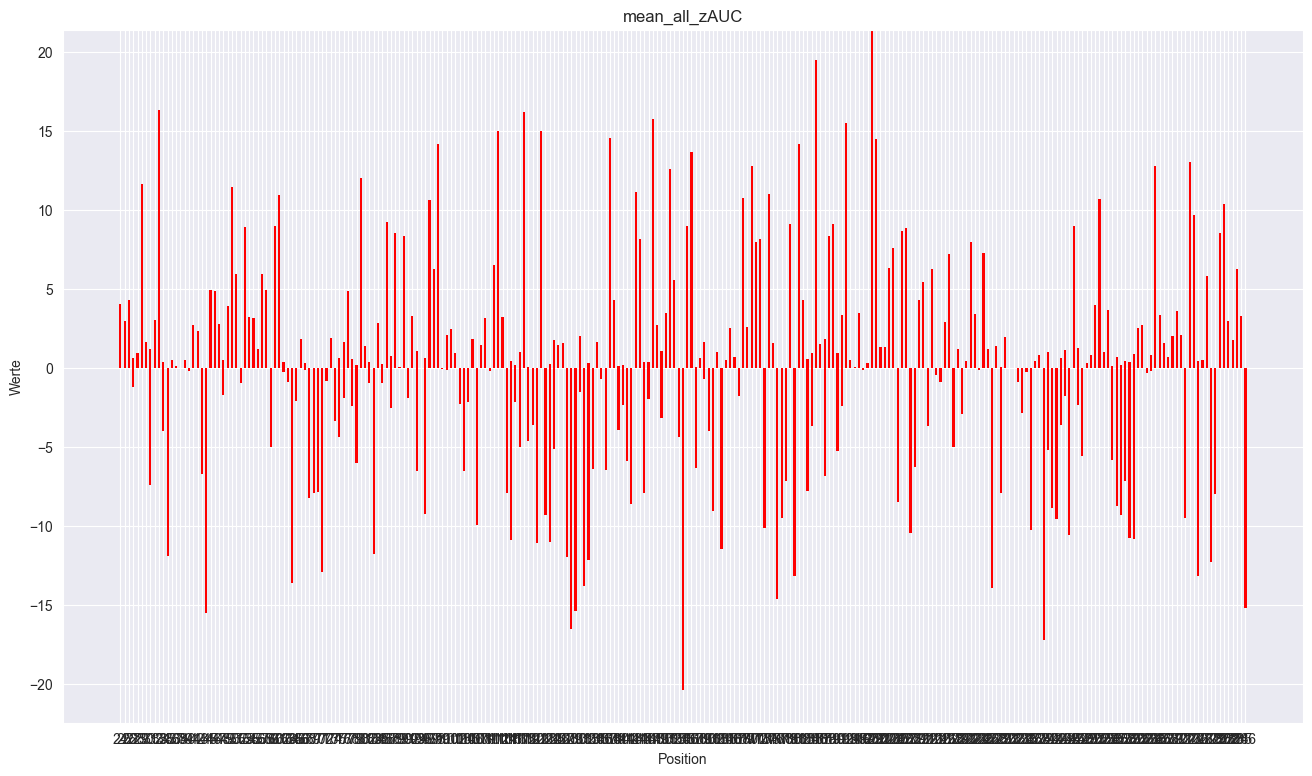

In [33]:
#plotten

positions = top_auc_df.index

for i in range (0, len(top_auc_df.columns)):
    top_values = top_auc_df.iloc[:,i]
    bottom_values = bottom_auc_df.iloc[:,i]*-1

# X-Koordinaten für die Balkenpositionen
    x = range(len(positions))

# Barplot erstellen
    plt.figure(figsize=(16,9))
    plt.bar(x, top_values, label='Top',color='red', width=0.5, linewidth=0)
    plt.bar(x, bottom_values, width=0.5, linewidth=0, label='Bottom', bottom=top_values, color='red')

# Achsenbeschriftungen
    plt.xlabel('Position')
    plt.ylabel('Werte')
    plt.xticks(x, positions)
    plt.title(top_auc_df.columns[i])

# Plot anzeigen
    plt.show()

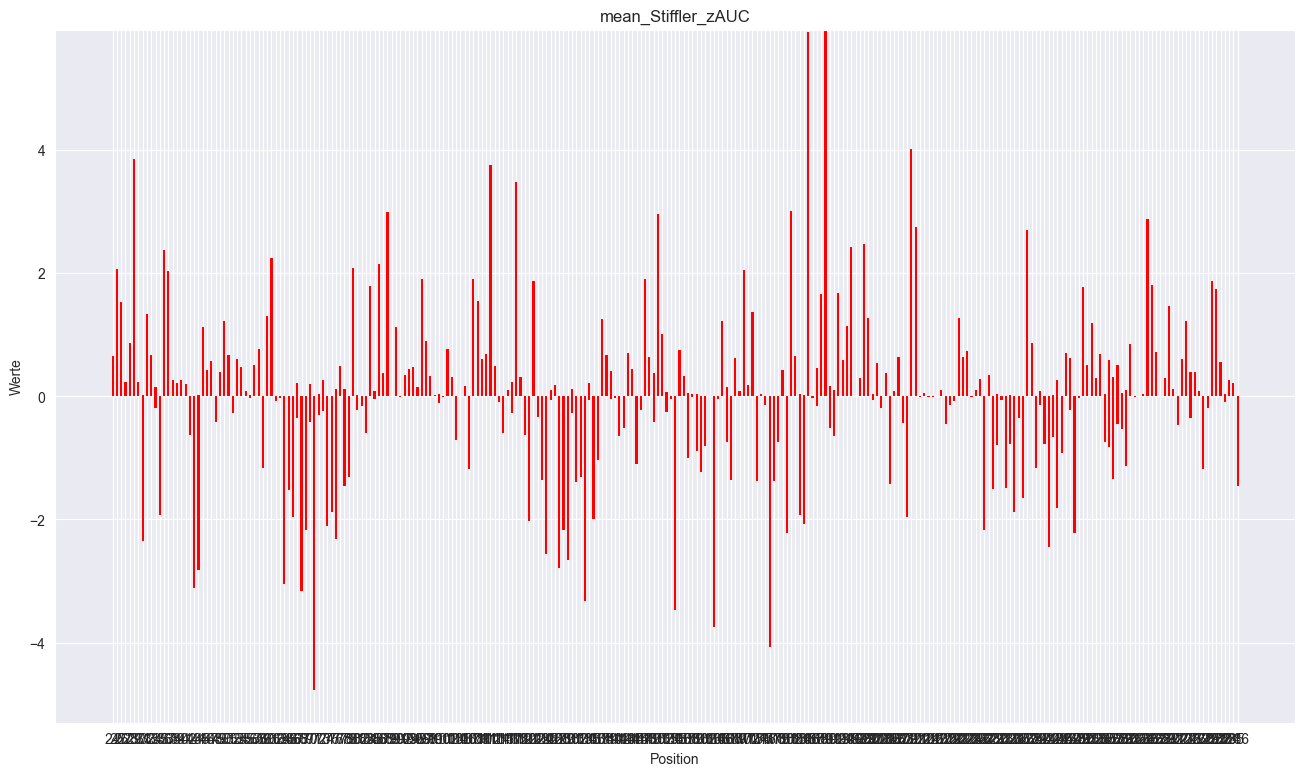

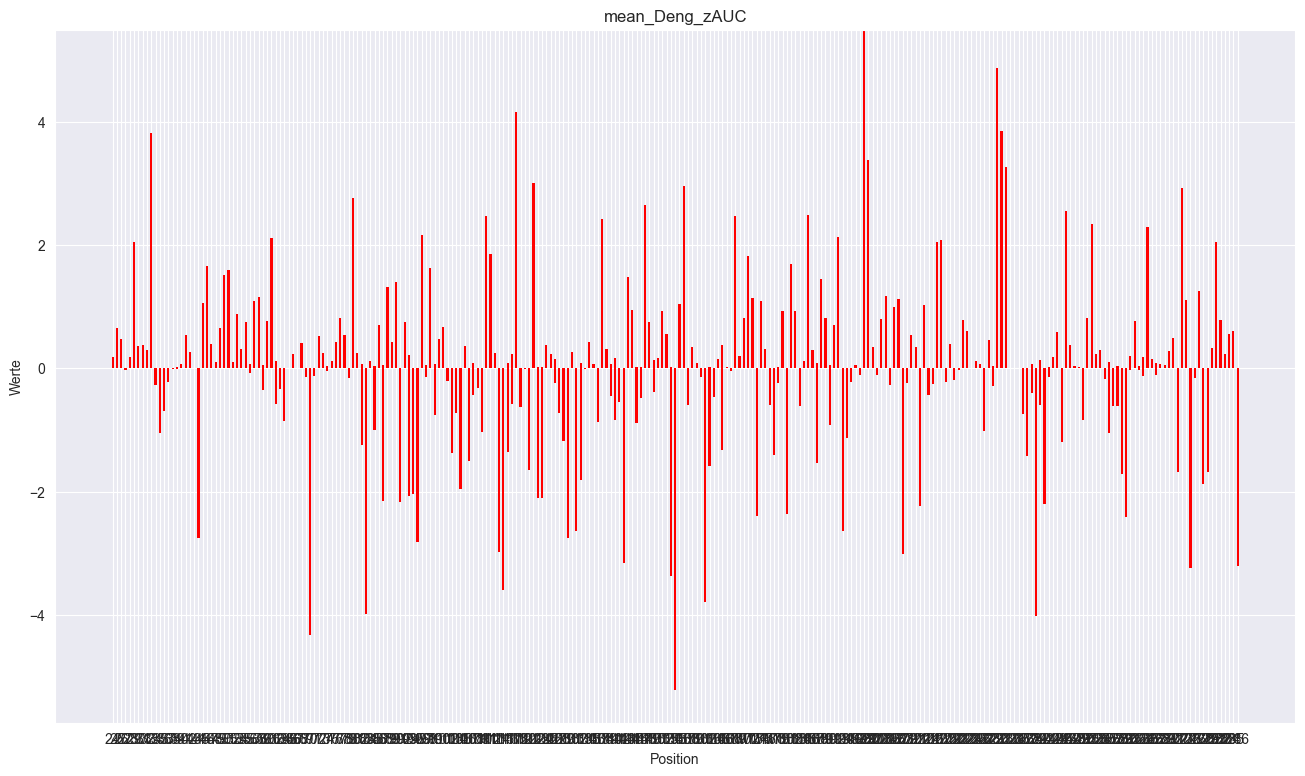

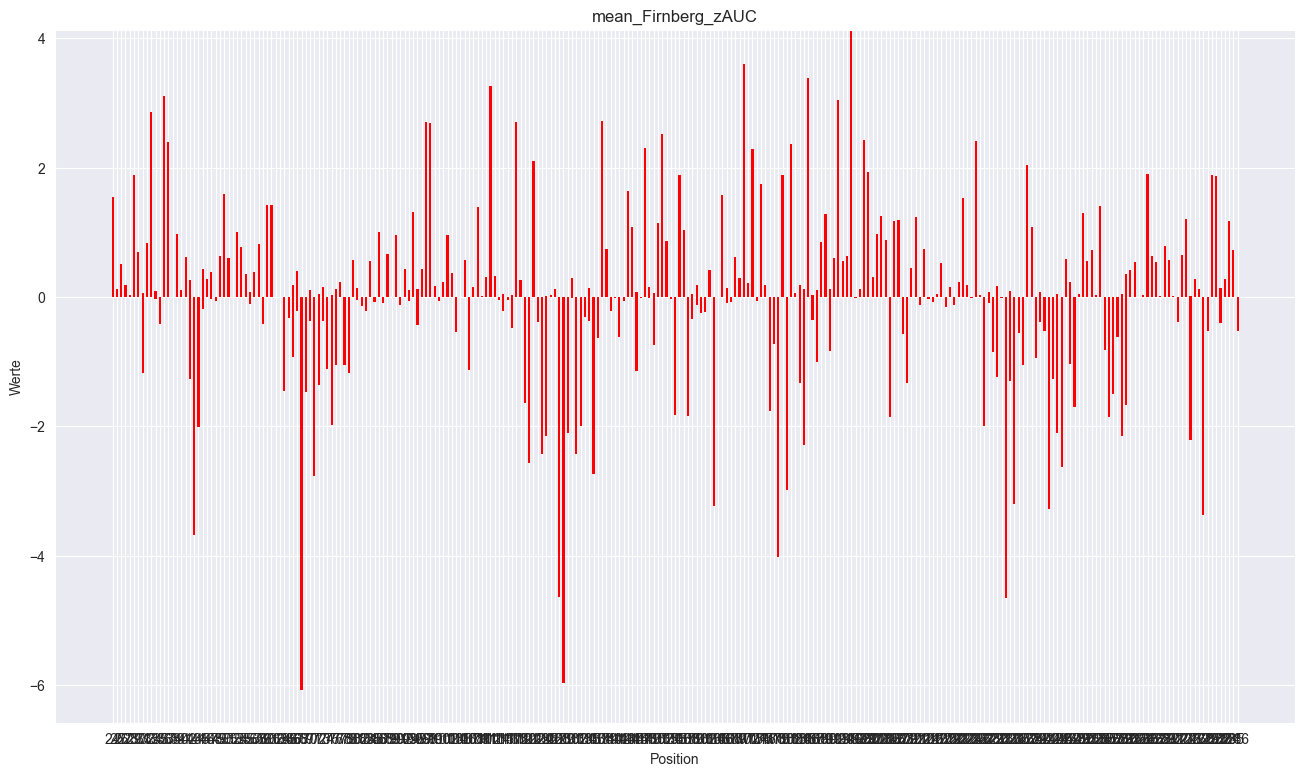

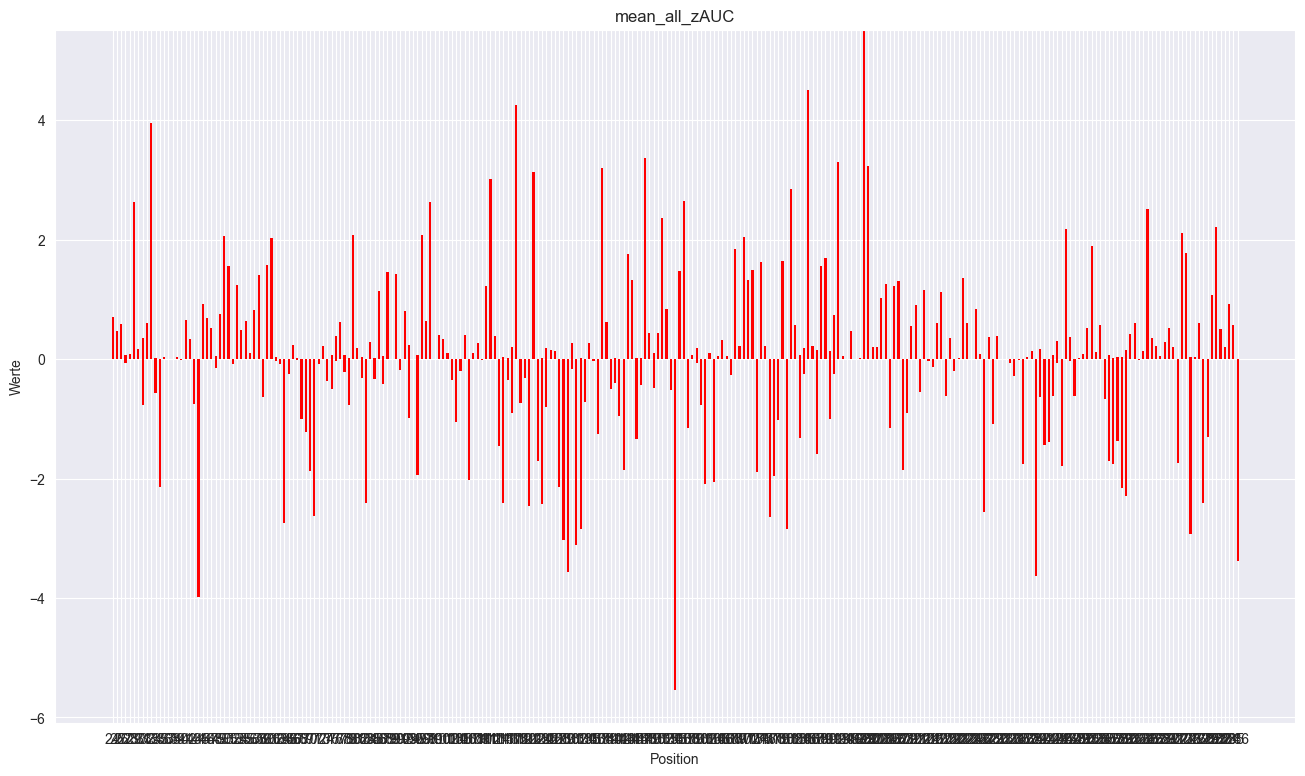

In [34]:
#extremere Werte stärer Gewichten (k=0 für ungewichtet; ansosnten je höher k, desto höher gewichtet sind extremere Bereiche)
k=11 #<----------------------!!!!!!!!!! STellschraube :P

top_used_quantiles=np.array(top_used_quantiles)
bottom_used_quantiles=np.flip(top_used_quantiles)

top_pos_eff_quantiles_df_weighted=top_pos_eff_quantiles_df.copy()
for i in range(0, len(top_pos_eff_quantiles_df.columns)):
    for j in range(0, len(top_pos_eff_quantiles_df)):
        top_pos_eff_quantiles_df_weighted.iloc[j,i]=top_pos_eff_quantiles_df.iloc[j,i]*(top_used_quantiles**k)

bottom_pos_eff_quantiles_df_weighted=bottom_pos_eff_quantiles_df.copy()
for i in range(0, len(bottom_pos_eff_quantiles_df.columns)):
    for j in range(0, len(bottom_pos_eff_quantiles_df)):
        bottom_pos_eff_quantiles_df_weighted.iloc[j,i]=bottom_pos_eff_quantiles_df.iloc[j,i]*(bottom_used_quantiles**k)

#same AUC stuff as above

from scipy.integrate import trapz

top_auc_df_weighted = pd.DataFrame()

# Berechnung der AUC für jede Spalte und Speicherung im neuen DataFrame
for col in top_pos_eff_quantiles_df_weighted.columns:
    if col != 'Position':
        new_col_name = col + 'AUC'
        auc_values = top_pos_eff_quantiles_df_weighted[col].apply(lambda x: trapz(x, dx=1))
        top_auc_df_weighted[new_col_name] = auc_values

# Zusammenführen der Positionsspalte mit dem neuen DataFrame
top_auc_df_weighted.index.name = 'Position'

bottom_auc_df_weighted = pd.DataFrame()

# Berechnung der AUC für jede Spalte und Speicherung im neuen DataFrame
for col in bottom_pos_eff_quantiles_df_weighted.columns:
    if col != 'Position':
        new_col_name = col + 'AUC'
        auc_values = bottom_pos_eff_quantiles_df_weighted[col].apply(lambda x: trapz(x, dx=1))
        bottom_auc_df_weighted[new_col_name] = auc_values

# Zusammenführen der Positionsspalte mit dem neuen DataFrame
bottom_auc_df_weighted.index.name = 'Position'

#plotten

positions = top_auc_df_weighted.index

for i in range(0, len(top_auc_df_weighted.columns)):
    top_values = top_auc_df_weighted.iloc[:, i]
    bottom_values = bottom_auc_df_weighted.iloc[:, i] * -1

    # X-Koordinaten für die Balkenpositionen
    x = range(len(positions))

    # Barplot erstellen
    plt.figure(figsize=(16, 9))
    plt.bar(x, top_values, label='Top', color='red', width=0.5, linewidth=0)
    plt.bar(x, bottom_values, width=0.5, linewidth=0, label='Bottom', bottom=top_values, color='red')

    # Achsenbeschriftungen
    plt.xlabel('Position')
    plt.ylabel('Werte')
    plt.xticks(x, positions)
    plt.title(top_auc_df_weighted.columns[i])

    # Plot anzeigen
    plt.show()

In [35]:
#verschiedene Ranglisten mit Wilcoxon Rank Sum Test untersuchen
#->signifikante Unterschiede in DS und Methoden?

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
"""
Erklärung:
Hier werden die verschiedenen sekundären Strukturen den jeweiligen Aminosäurebereichen zugeordnet.
Anschließend wird im DF structure_elements noch definiert, ob ein Strukturelement der Domäne 1 oder 2 zugehörig ist.
Quelle: DOI: 10.1107/S0907444994014496
"""
structure_sequence_allignment = {
    'Element': ['h1', 'b1', 'b2', 'h2', 'h3a', 'h3b', 'h4', 'h5', 'h6', 'h7', 'h8', 'h9', 'h10', 'b3', 'b4', 'b5', 'h11'],
    'Range': ['27-40', '43-50', '56-60', '72-85', '99-101', '109-114', '119-128', '132-142', '145-154', '168-170',
              '183-195', '201-212', '221-224', '230-237', '244-251', '259-266', '272-288']
}

domain1_elements = ['h1', 'b1', 'b2', 'h8', 'h10', 'b3', 'b4', 'b5', 'h11']
structural_elements = pd.DataFrame(structure_sequence_allignment)
structural_elements["Domain"] = None

for i in range(len(structural_elements["Element"])):
    if structural_elements.iloc[i, 0] in domain1_elements:
        structural_elements.iloc[i, 2] = 1
    else:
        structural_elements.iloc[i, 2] = 2

structural_elements

Element    Range Domain
0       h1    27-40      1
1       b1    43-50      1
2       b2    56-60      1
3       h2    72-85      2
4      h3a   99-101      2
5      h3b  109-114      2
6       h4  119-128      2
7       h5  132-142      2
8       h6  145-154      2
9       h7  168-170      2
10      h8  183-195      1
11      h9  201-212      2
12     h10  221-224      1
13      b3  230-237      1
14      b4  244-251      1
15      b5  259-266      1
16     h11  272-288      1

In [45]:
"""
Hier werden für jede Position die jeweiligen Domains und structural_elements zugewiesen.

Dabei werden für jede Zeile des DF structural_elements die Range Werte aus dem DF structural_elements mit dem map befehl in zwei Zahlen aufgeteilt, die durch "-" getrennt sind, und als int gespeichert.
Damit hat man die Range gespeichert. Nun werden alle Positionen vom position_elements_alignment, die innerhalb der Range des jeweiligen Elements liegen mit diesem in der Spalte "Element" versehen.
Danach wird für dieses Element geprüft ob es teil der Domäne 1 ist. Wenn ja, dann werden alle entsprechenden Zeilen in der Spalte "Domain" mit 1 versehen, wenn nicht mit 2.
"""

# Erstelle den DataFrame für die Positionen
position_elements_alignment = pd.DataFrame({'Position': range(24, 269)})

# Erstelle Spalten für Structural Element und Domain
position_elements_alignment['Structural_Element'] = None
position_elements_alignment['Domain'] = None

# Iteriere über die Ranges im structural_elements DataFrame
for index, row in structural_elements.iterrows():
    start, end = map(int, row['Range'].split('-'))

    # Setze die Werte für die entsprechenden Positionen im position_elements_alignment
    position_elements_alignment.loc[(position_elements_alignment['Position'] >= start) & (position_elements_alignment['Position'] <= end), 'Structural_Element'] = row['Element']

    if row['Element'] in domain1_elements:
        position_elements_alignment.loc[(position_elements_alignment['Position'] >= start) & (position_elements_alignment['Position'] <= end), 'Domain'] = 1
    else:
        position_elements_alignment.loc[(position_elements_alignment['Position'] >= start) & (position_elements_alignment['Position'] <= end), 'Domain'] = 2

# Nun wird die Positionsspalte als Index verwendet. Da es zu aufwendig wäre den gesamten Code nochmal umzuschreiben wird die Spalte "Position" einfach gelösscht
position_elements_alignment = position_elements_alignment.set_index('Position', drop=False)
position_elements_alignment = position_elements_alignment.drop("Position", axis = 1)


position_elements_alignment

Structural_Element Domain
Position                          
24                     None   None
25                     None   None
26                     None   None
27                       h1      1
28                       h1      1
...                     ...    ...
264                      b5      1
265                      b5      1
266                      b5      1
267                    None   None
268                    None   None

[245 rows x 2 columns]

In [46]:
"""
Erklärung:
Hier werden copien der drei wichtigen Dataframes gemacht, die für die Analyse gebraucht werden.
Da neue Spalten während der Analyse hinzugefügt werden, erstellen wir extra "Analyse-DataFrames", damit wir nicht durch eine Spaltenverschiebung den oberen Code stören.

Zudem werden am Beginn jedes Analyse-DFs noch die Spalten "Domain" und "Structural_Element" hinzugefügt.
"""
mergedc_z_mv_analysis = mergedc_z_mv.copy()
top_auc_df_weighted_analysis = top_auc_df_weighted.copy()
bottom_auc_df_weighted_analysis = bottom_auc_df_weighted.copy()


bottom_auc_df_weighted_analysis.insert(0, "Domain", position_elements_alignment.loc[: , "Domain"])
bottom_auc_df_weighted_analysis.insert(1, "Structual_Element", position_elements_alignment.loc[: , "Structural_Element"])

mergedc_z_mv_analysis.insert(0, "Domain", position_elements_alignment.loc[: , "Domain"])
mergedc_z_mv_analysis.insert(1, "Structual_Element", position_elements_alignment.loc[: , "Structural_Element"])

top_auc_df_weighted_analysis.insert(0, "Domain", position_elements_alignment.loc[: , "Domain"])
top_auc_df_weighted_analysis.insert(1, "Structual_Element", position_elements_alignment.loc[: , "Structural_Element"])

In [47]:
bottom_auc_df_weighted_analysis

Domain Structual_Element  mean_Stiffler_zAUC  mean_Deng_zAUC  \
Position                                                                
24         None              None            0.000000        0.115346   
25         None              None            0.000000        0.000000   
26         None              None            0.000000        0.000000   
27            1                h1            0.212493        0.028022   
28            1                h1            0.044158        0.055596   
...         ...               ...                 ...             ...   
282         NaN               NaN            0.548602        0.010074   
283         NaN               NaN            0.128440        0.101862   
284         NaN               NaN            0.018532        0.003683   
285         NaN               NaN            0.088315        0.074128   
286         NaN               NaN            1.461387        3.206662   

          mean_Firnberg_zAUC  mean_all_zAUC  
Position                                     
24                  0.000000       0.000000  
25                  0.000000       0.000000  
26                  0.000000       0.000000  
27                  0.075636       0.137241  
28                  0.001111       0.023715  
...                      ...            ...  
282                 0.550766       0.048179  
283                 0.120586       0.059617  
284                 0.010074       0.044158  
285                 0.029647       0.110971  
286                 0.520174       3.383812  

[263 rows x 6 columns]

In [48]:
top_auc_df_weighted_analysis

Domain Structual_Element  mean_Stiffler_zAUC  mean_Deng_zAUC  \
Position                                                                
24         None              None            0.663489        0.191877   
25         None              None            2.064359        0.661925   
26         None              None            1.534966        0.478373   
27            1                h1            0.238337        0.001111   
28            1                h1            0.865264        0.190230   
...         ...               ...                 ...             ...   
282         NaN               NaN            0.562748        0.777499   
283         NaN               NaN            0.036425        0.227741   
284         NaN               NaN            0.259216        0.557761   
285         NaN               NaN            0.209512        0.606344   
286         NaN               NaN            0.000000        0.000000   

          mean_Firnberg_zAUC  mean_all_zAUC  
Position                                     
24                  1.542426       0.703976  
25                  0.127719       0.469125  
26                  0.515857       0.584128  
27                  0.181753       0.074357  
28                  0.033789       0.091084  
...                      ...            ...  
282                 0.140618       0.507954  
283                 0.282003       0.196727  
284                 1.173985       0.919025  
285                 0.723598       0.568803  
286                 0.000000       0.000000  

[263 rows x 6 columns]

[13, 7, 4, 13, 2, 5, 9, 10, 9, 2, 12, 11, 3, 7, 7, 7, 16]


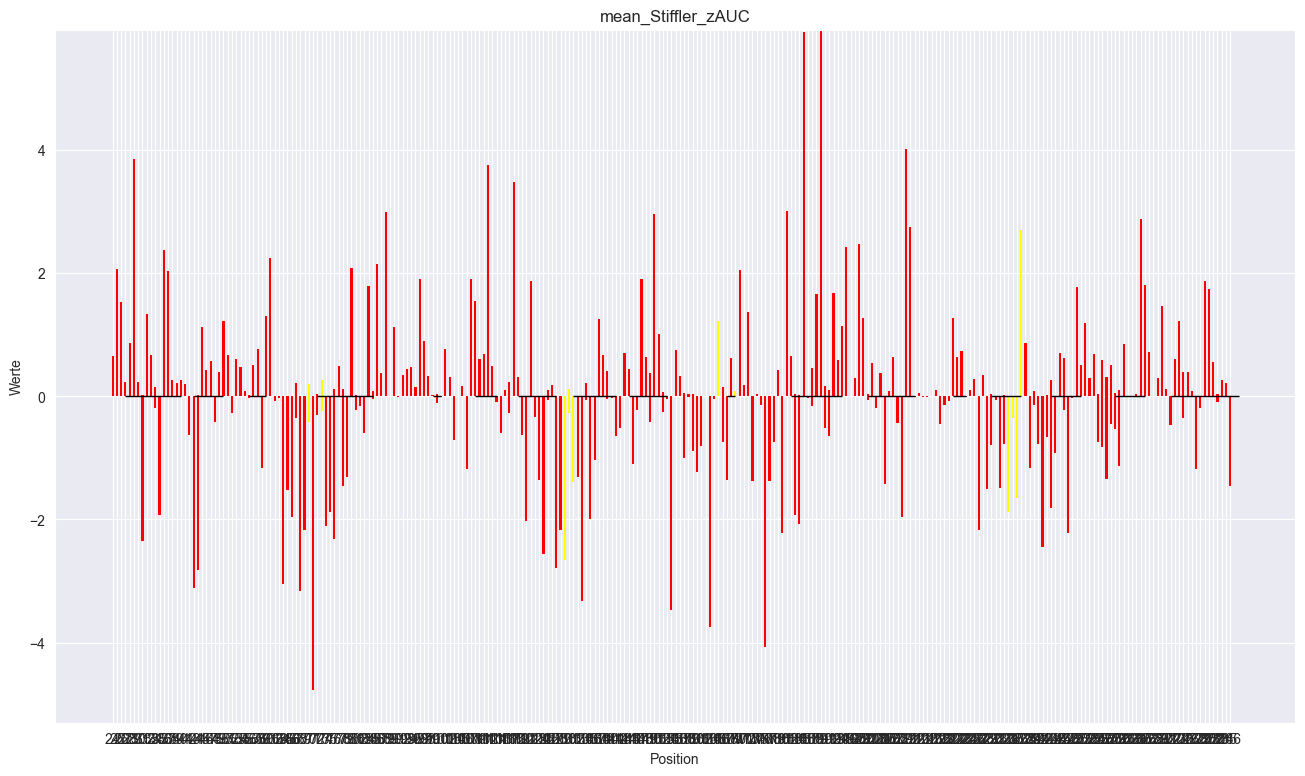

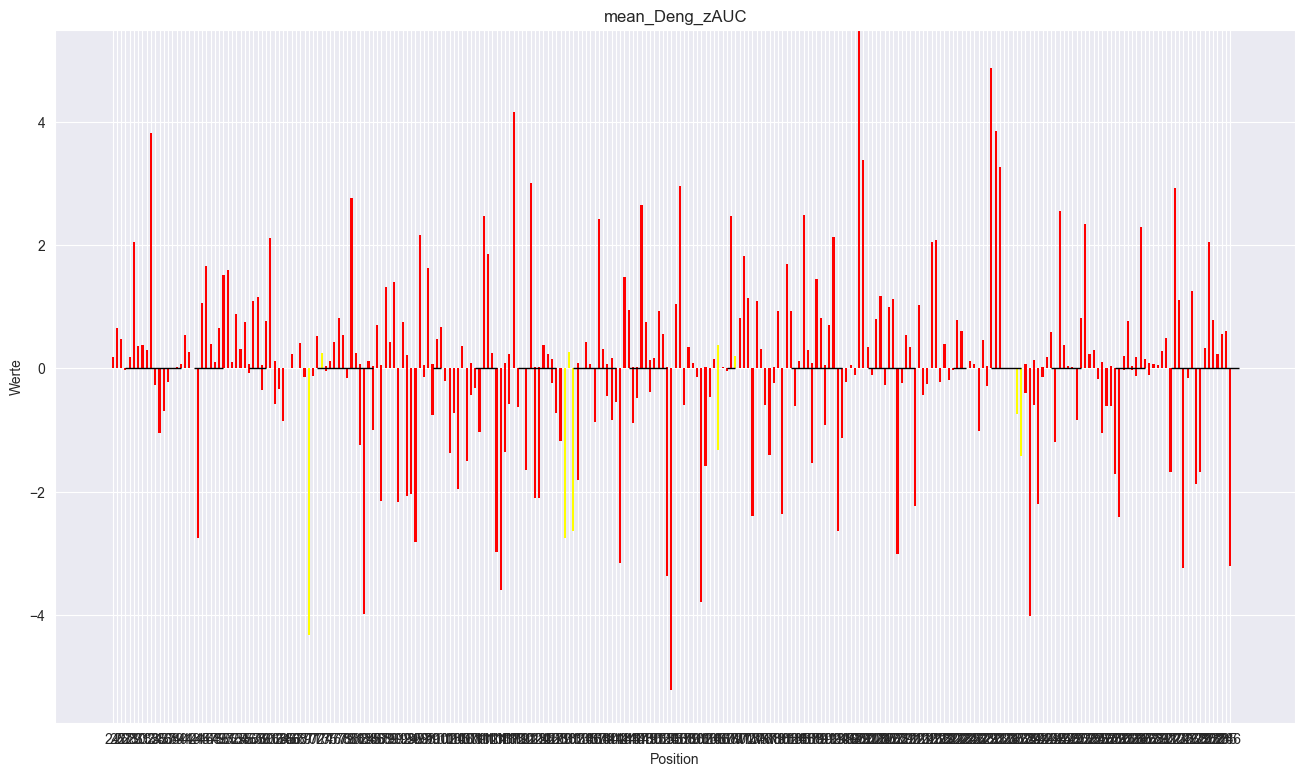

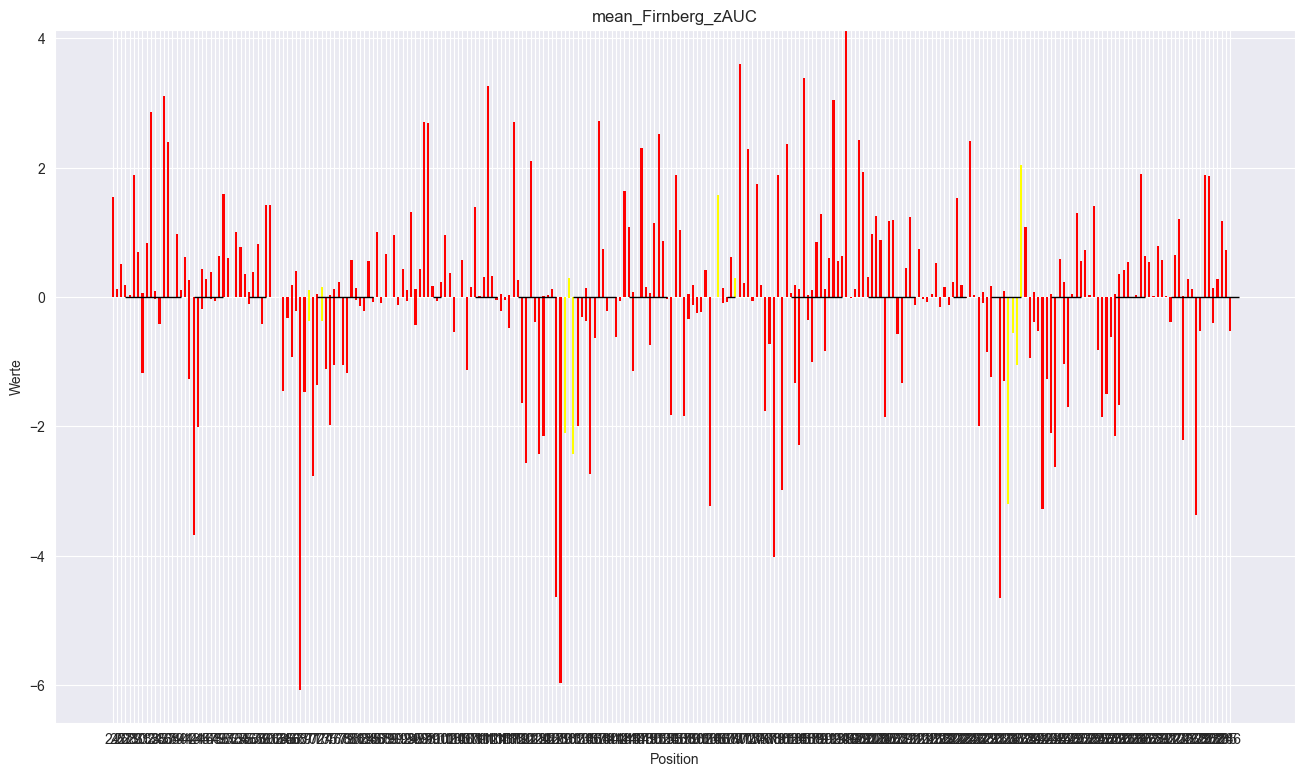

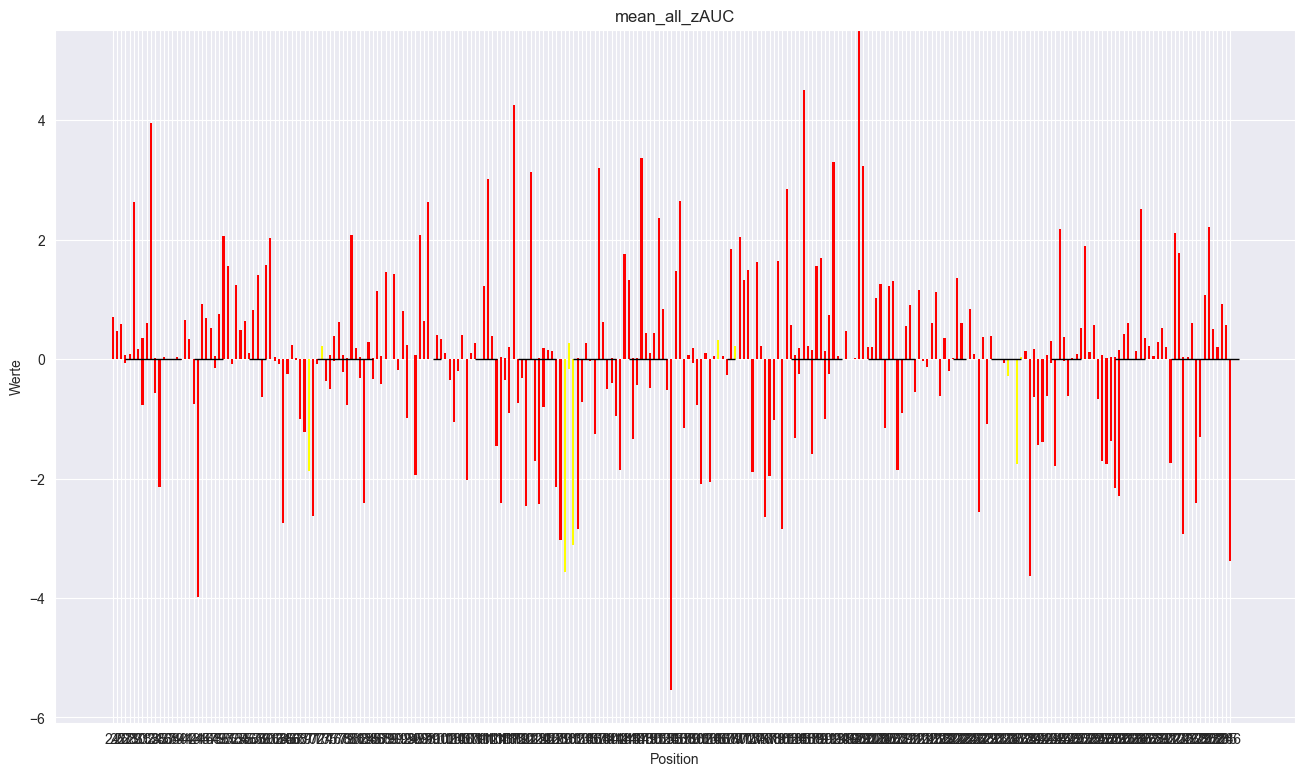

In [49]:
width = []
left = []
for index, row in structural_elements.iterrows():
    start, end = map(int, row['Range'].split('-'))
    width.append(end - start)
    left.append(start - 24)
print(width)




#extremere Werte stärer Gewichten (k=0 für ungewichtet; ansosnten je höher k, desto höher gewichtet sind extremere Bereiche)
k=11 #<----------------------!!!!!!!!!! STellschraube :P

top_used_quantiles=np.array(top_used_quantiles)
bottom_used_quantiles=np.flip(top_used_quantiles)

top_pos_eff_quantiles_df_weighted=top_pos_eff_quantiles_df.copy()
for i in range(0, len(top_pos_eff_quantiles_df.columns)):
    for j in range(0, len(top_pos_eff_quantiles_df)):
        top_pos_eff_quantiles_df_weighted.iloc[j,i]=top_pos_eff_quantiles_df.iloc[j,i]*(top_used_quantiles**k)

bottom_pos_eff_quantiles_df_weighted=bottom_pos_eff_quantiles_df.copy()
for i in range(0, len(bottom_pos_eff_quantiles_df.columns)):
    for j in range(0, len(bottom_pos_eff_quantiles_df)):
        bottom_pos_eff_quantiles_df_weighted.iloc[j,i]=bottom_pos_eff_quantiles_df.iloc[j,i]*(bottom_used_quantiles**k)

#same AUC stuff as above

from scipy.integrate import trapz

top_auc_df_weighted = pd.DataFrame()

# Berechnung der AUC für jede Spalte und Speicherung im neuen DataFrame
for col in top_pos_eff_quantiles_df_weighted.columns:
    if col != 'Position':
        new_col_name = col + 'AUC'
        auc_values = top_pos_eff_quantiles_df_weighted[col].apply(lambda x: trapz(x, dx=1))
        top_auc_df_weighted[new_col_name] = auc_values

# Zusammenführen der Positionsspalte mit dem neuen DataFrame
top_auc_df_weighted.index.name = 'Position'

bottom_auc_df_weighted = pd.DataFrame()

# Berechnung der AUC für jede Spalte und Speicherung im neuen DataFrame
for col in bottom_pos_eff_quantiles_df_weighted.columns:
    if col != 'Position':
        new_col_name = col + 'AUC'
        auc_values = bottom_pos_eff_quantiles_df_weighted[col].apply(lambda x: trapz(x, dx=1))
        bottom_auc_df_weighted[new_col_name] = auc_values

# Zusammenführen der Positionsspalte mit dem neuen DataFrame
bottom_auc_df_weighted.index.name = 'Position'

#plotten

positions = top_auc_df_weighted.index

top_auc_df_weighted = top_auc_df_weighted.reset_index(drop=True)
bottom_auc_df_weighted = bottom_auc_df_weighted.reset_index(drop=True)

for i in range(0, len(top_auc_df_weighted.columns)):
    top_values = top_auc_df_weighted.iloc[:, i]
    bottom_values = bottom_auc_df_weighted.iloc[:, i] * -1

    # X-Koordinaten für die Balkenpositionen
    x = range(len(positions))

    # Barplot erstellen
    plt.figure(figsize=(16, 9))

    # Gelbe und rote Balken hinzufügen
    yellow_positions = [70, 73, 130, 131, 132, 166, 170, 234, 235, 236, 237]
    for j in range(len(positions)):
        if positions[j] in yellow_positions:
            color = 'yellow'
        else:
            color = 'red'
        plt.bar(x[j], top_values[j], color=color, width=0.5, linewidth=0)
        plt.bar(x[j], bottom_values[j], color=color, width=0.5, linewidth=0, bottom=top_values[j])

    # Achsenbeschriftungen
    plt.xlabel('Position')
    plt.ylabel('Werte')
    plt.xticks(x, positions)
    plt.title(top_auc_df_weighted.columns[i])
    plt.barh(0 , width, height=0.001, left=left, align='center', color=None, edgecolor='black', linewidth=1.0)
    # Plot anzeigen
    plt.show()


In [50]:
"""
Hier werden die Positionen ausgegeben, die im 1% Quantil nach oben, bzw. nach unten liegen. Dadurch bekommt man die Exprempositionen und kann die mit Papern vergleichen (Konserviert, etc.)
"""

for spalte in top_auc_df_weighted_analysis.columns[top_auc_df_weighted_analysis.columns.get_loc("mean_Stiffler_zAUC"):top_auc_df_weighted_analysis.columns.get_loc("mean_all_zAUC") + 1]:
    extremwert_top = top_auc_df_weighted_analysis.loc[top_auc_df_weighted_analysis[spalte] >= top_auc_df_weighted_analysis[spalte].quantile(0.99)][spalte]

    print(spalte)
    print("Topwerte")
    print(extremwert_top)
    print(" ")



for spalte in bottom_auc_df_weighted_analysis.columns[bottom_auc_df_weighted_analysis.columns.get_loc("mean_Stiffler_zAUC"):bottom_auc_df_weighted_analysis.columns.get_loc("mean_all_zAUC") + 1]:
    extremwert_bottom = bottom_auc_df_weighted_analysis.loc[bottom_auc_df_weighted_analysis[spalte] >= bottom_auc_df_weighted_analysis[spalte].quantile(0.99)][spalte]
    print(spalte)
    print("Bottomwerte")
    print(extremwert_bottom)
    print(" ")

mean_Stiffler_zAUC
Topwerte
Position
186    5.912976
190    5.957377
210    4.015265
Name: mean_Stiffler_zAUC, dtype: float64
 
mean_Deng_zAUC
Topwerte
Position
118    4.156299
199    5.491048
230    4.864108
Name: mean_Deng_zAUC, dtype: float64
 
mean_Firnberg_zAUC
Topwerte
Position
171    3.600169
186    3.389697
196    4.130699
Name: mean_Firnberg_zAUC, dtype: float64
 
mean_all_zAUC
Topwerte
Position
118    4.244253
186    4.510284
199    5.512762
Name: mean_all_zAUC, dtype: float64
 
mean_Stiffler_zAUC
Bottomwerte
Position
71     4.767263
164    3.746275
177    4.072046
Name: mean_Stiffler_zAUC, dtype: float64
 
mean_Deng_zAUC
Bottomwerte
Position
70     4.329791
155    5.210450
239    4.010056
Name: mean_Deng_zAUC, dtype: float64
 
mean_Firnberg_zAUC
Bottomwerte
Position
68     6.071191
129    5.960606
232    4.646686
Name: mean_Firnberg_zAUC, dtype: float64
 
mean_all_zAUC
Bottomwerte
Position
44     3.975238
155    5.535749
239    3.634991
Name: mean_all_zAUC, dtype: float64
 


In [51]:
structural_elements

Element    Range Domain
0       h1    27-40      1
1       b1    43-50      1
2       b2    56-60      1
3       h2    72-85      2
4      h3a   99-101      2
5      h3b  109-114      2
6       h4  119-128      2
7       h5  132-142      2
8       h6  145-154      2
9       h7  168-170      2
10      h8  183-195      1
11      h9  201-212      2
12     h10  221-224      1
13      b3  230-237      1
14      b4  244-251      1
15      b5  259-266      1
16     h11  272-288      1

In [52]:
mergedc_z_mv_analysis

Domain Structual_Element  Stiffler      Deng  Firnberg      mean  \
H24C     NaN               NaN  0.727139 -0.788864  0.122813  0.020363   
H24Y     NaN               NaN  0.321797  0.359935  0.436558  0.372763   
H24W     NaN               NaN -0.079893 -1.064359  0.206374 -0.312626   
H24V     NaN               NaN  1.067021 -0.191058   1.58859  0.821518   
H24T     NaN               NaN  1.032012  0.755934  1.603074   1.13034   
...      ...               ...       ...       ...       ...       ...   
W286G    NaN               NaN -1.713229 -1.468922 -1.122809 -1.434986   
W286F    NaN               NaN  0.412633 -1.193425 -0.750014 -0.510269   
W286E    NaN               NaN -1.120475 -1.193425 -1.097183 -1.137028   
W286C    NaN               NaN -1.500758 -1.193425 -1.129939 -1.274708   
W286A    NaN               NaN -1.670129 -1.468922       NaN -1.569525   

            var  Position  
H24C   0.388292        24  
H24Y   0.002277        24  
H24W    0.29621        24  
H24V   0.557994        24  
H24T   0.124442        24  
...         ...       ...  
W286G  0.058675       286  
W286F  0.458642       286  
W286E  0.001681       286  
W286C  0.026221       286  
W286A  0.010121       286  

[4996 rows x 8 columns]

In [53]:
# Leeren DataFrame mit dem gleichen Index wie top_auc_df_weighted_analysis erstellen
auc_df_weighted_analysis = pd.DataFrame(index=top_auc_df_weighted_analysis.index)

# Spalten "Domain" und "Structural_Element" hinzufügen
auc_df_weighted_analysis["Domain"] = top_auc_df_weighted_analysis.iloc[0]
auc_df_weighted_analysis["Structural_Element"] = top_auc_df_weighted_analysis.iloc[1]

# Iteration über die Zeilen von top_auc_df_weighted_analysis
for index, row in top_auc_df_weighted_analysis.iterrows():
    for column in ["mean_Stiffler_zAUC", "mean_Deng_zAUC", "mean_Firnberg_zAUC", "mean_all_zAUC"]:
        top_value = top_auc_df_weighted_analysis.loc[index, column]
        bottom_value = bottom_auc_df_weighted_analysis.loc[index, column]

        if top_value == bottom_value:
            if top_value == 0:
                auc_df_weighted_analysis.loc[index, column] = 0
            else:
                auc_df_weighted_analysis.loc[index, column] = "SHIT"
        elif top_value >= bottom_value:
            auc_df_weighted_analysis.loc[index, column] = top_value
        else:
            auc_df_weighted_analysis.loc[index, column] = -bottom_value

# Ergebnis anzeigen
auc_df_weighted_analysis


Domain Structural_Element  mean_Stiffler_zAUC  mean_Deng_zAUC  \
Position                                                                 
24          NaN                NaN            0.663489        0.191877   
25          NaN                NaN            2.064359        0.661925   
26          NaN                NaN            1.534966        0.478373   
27          NaN                NaN            0.238337       -0.028022   
28          NaN                NaN            0.865264        0.190230   
...         ...                ...                 ...             ...   
282         NaN                NaN            0.562748        0.777499   
283         NaN                NaN           -0.128440        0.227741   
284         NaN                NaN            0.259216        0.557761   
285         NaN                NaN            0.209512        0.606344   
286         NaN                NaN           -1.461387       -3.206662   

          mean_Firnberg_zAUC  mean_all_zAUC  
Position                                     
24                  1.542426       0.703976  
25                  0.127719       0.469125  
26                  0.515857       0.584128  
27                  0.181753      -0.137241  
28                  0.033789       0.091084  
...                      ...            ...  
282                -0.550766       0.507954  
283                 0.282003       0.196727  
284                 1.173985       0.919025  
285                 0.723598       0.568803  
286                -0.520174      -3.383812  

[263 rows x 6 columns]

In [54]:
structural_elements

Element    Range Domain
0       h1    27-40      1
1       b1    43-50      1
2       b2    56-60      1
3       h2    72-85      2
4      h3a   99-101      2
5      h3b  109-114      2
6       h4  119-128      2
7       h5  132-142      2
8       h6  145-154      2
9       h7  168-170      2
10      h8  183-195      1
11      h9  201-212      2
12     h10  221-224      1
13      b3  230-237      1
14      b4  244-251      1
15      b5  259-266      1
16     h11  272-288      1

In [55]:
structural_elements["Varianz"] = np.nan

In [56]:
structural_elements

Element    Range Domain  Varianz
0       h1    27-40      1      NaN
1       b1    43-50      1      NaN
2       b2    56-60      1      NaN
3       h2    72-85      2      NaN
4      h3a   99-101      2      NaN
5      h3b  109-114      2      NaN
6       h4  119-128      2      NaN
7       h5  132-142      2      NaN
8       h6  145-154      2      NaN
9       h7  168-170      2      NaN
10      h8  183-195      1      NaN
11      h9  201-212      2      NaN
12     h10  221-224      1      NaN
13      b3  230-237      1      NaN
14      b4  244-251      1      NaN
15      b5  259-266      1      NaN
16     h11  272-288      1      NaN

In [58]:
for index, row in structural_elements.iterrows():
    start, end = map(int, row['Range'].split('-'))
    for column in ["Stiffler", "Firnberg", "Deng", "all"]:
        varianz = auc_df_weighted_analysis.loc[start:end, f"mean_{column}_zAUC"].var()
        structural_elements.at[index, f"{column}_Varianz"] = varianz


structural_elements


Element    Range Domain   Varianz  Stiffler_Varianz  Firnberg_Varianz  \
0       h1    27-40      1  2.542601          2.542601          1.675672   
1       b1    43-50      1  2.938059          2.938059          2.693607   
2       b2    56-60      1  0.878725          0.878725          0.558736   
3       h2    72-85      2  1.793507          1.793507          0.613739   
4      h3a   99-101      2  0.007641          0.007641          0.025990   
5      h3b  109-114      2  1.883162          1.883162          1.632673   
6       h4  119-128      2  2.101269          2.101269          3.690430   
7       h5  132-142      2  1.590850          1.590850          2.323607   
8       h6  145-154      2  1.555848          1.555848          1.536376   
9       h7  168-170      2  1.056440          1.056440          0.121583   
10      h8  183-195      1  6.471896          6.471896          2.775266   
11      h9  201-212      2  2.646548          2.646548          1.130005   
12     h10  221-224      1  0.275641          0.275641          0.504368   
13      b3  230-237      1  2.124877          2.124877          4.036515   
14      b4  244-251      1  1.930009          1.930009          2.130728   
15      b5  259-266      1  1.775852          1.775852          1.902057   
16     h11  272-288      1  0.918033          0.918033          2.025603   

    Deng_Varianz  all_Varianz  
0       1.479176     2.173030  
1       1.923718     3.253392  
2       0.511196     0.844710  
3       2.137136     0.915327  
4       0.652826     0.045506  
5       3.920930     2.209098  
6       2.273258     2.835569  
7       1.736112     2.903882  
8       2.495012     2.114932  
9       1.915046     1.219563  
10      2.243740     3.445574  
11      1.720123     1.141812  
12      0.176532     0.406797  
13      5.659238     0.420306  
14      1.294330     1.271865  
15      2.067214     2.538023  
16      3.330115     3.291112

In [60]:
structural_elements

Element    Range Domain  Stiffler_Varianz  Firnberg_Varianz  Deng_Varianz  \
0       h1    27-40      1          2.542601          1.675672      1.479176   
1       b1    43-50      1          2.938059          2.693607      1.923718   
2       b2    56-60      1          0.878725          0.558736      0.511196   
3       h2    72-85      2          1.793507          0.613739      2.137136   
4      h3a   99-101      2          0.007641          0.025990      0.652826   
5      h3b  109-114      2          1.883162          1.632673      3.920930   
6       h4  119-128      2          2.101269          3.690430      2.273258   
7       h5  132-142      2          1.590850          2.323607      1.736112   
8       h6  145-154      2          1.555848          1.536376      2.495012   
9       h7  168-170      2          1.056440          0.121583      1.915046   
10      h8  183-195      1          6.471896          2.775266      2.243740   
11      h9  201-212      2          2.646548          1.130005      1.720123   
12     h10  221-224      1          0.275641          0.504368      0.176532   
13      b3  230-237      1          2.124877          4.036515      5.659238   
14      b4  244-251      1          1.930009          2.130728      1.294330   
15      b5  259-266      1          1.775852          1.902057      2.067214   
16     h11  272-288      1          0.918033          2.025603      3.330115   

    all_Varianz  
0      2.173030  
1      3.253392  
2      0.844710  
3      0.915327  
4      0.045506  
5      2.209098  
6      2.835569  
7      2.903882  
8      2.114932  
9      1.219563  
10     3.445574  
11     1.141812  
12     0.406797  
13     0.420306  
14     1.271865  
15     2.538023  
16     3.291112

In [68]:
"""
Okay das ist etwas sus, dass die Varianz immer um 1 ist. Hier weitermachen
"""
# Spaltennamen der Varianzen
variance_columns = ['Stiffler', 'Firnberg', 'Deng', 'mean']

# Leere DataFrame erstellen
mergedc_z_mv_analysis_var = pd.DataFrame(columns=variance_columns)

# Varianzwerte berechnen und in die Zeile einfügen
variance_values = []
for column in variance_columns:
    variance = mergedc_z_mv_analysis[column].var()
    variance_values.append(variance)

mergedc_z_mv_analysis_var.loc[0] = variance_values

mergedc_z_mv_analysis_var


Stiffler  Firnberg    Deng      mean
0    1.0002  1.000209  1.0002  0.813336

0.8133362598709978